In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm

In [79]:
b, mu, fi, bt, a, S, I, R = sm.symbols('b, mu, phi, beta, a, S, I, R')

In [80]:
dSdt = b - mu*S - fi*S - bt*S*I
dIdt = -mu*I - a*I + bt*S*I
dRdt = -mu*R + fi*S + a*I

In [81]:
sm.Matrix([dSdt, dIdt, dRdt])

Matrix([
[-I*S*beta - S*mu - S*phi + b],
[       I*S*beta - I*a - I*mu],
[          I*a - R*mu + S*phi]])

In [137]:
import random as rn
import pylab as pl

get_ipython().run_line_magic('matplotlib', 'inline')
def varying_extForce(N, Ts, ampl, mg):
    x0=pl.arange(0,N,Ts)
    sigs = np.zeros([10, len(x0)])

    phi = pl.linspace(0.001, 0.3, 100)
    amp = pl.linspace(0.2, 1, 100)

    for i in np.arange(10):

        amp1 = amp[rn.randint(0, 99)]
        phi1 = phi[rn.randint(0, 99)]

        y1= (amp1*pl.sin(phi1*pl.pi*x0) + mg)
        sigs[i:] = y1

    sigs1 = np.abs(ampl*np.apply_along_axis(np.mean, 0, sigs))
    plt.plot(sigs1)
    return(sigs1)


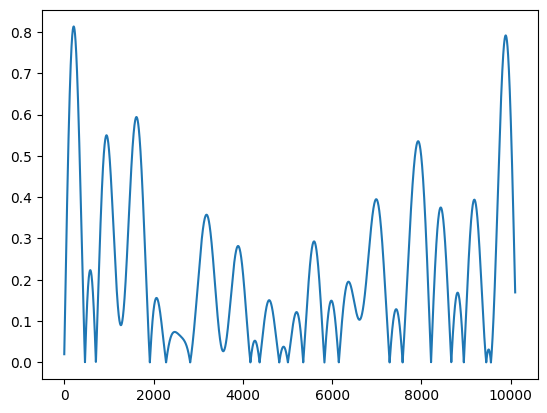

In [138]:
from scipy.integrate import solve_ivp
from scipy import stats
tend = 100
t_step = 0.01
t_span = (0, tend)
tint = np.linspace(0, tend, int(tend/t_step))

get_ipython().run_line_magic('matplotlib', 'inline')
btts= varying_extForce(tend+1, t_step, 2, 0.01)


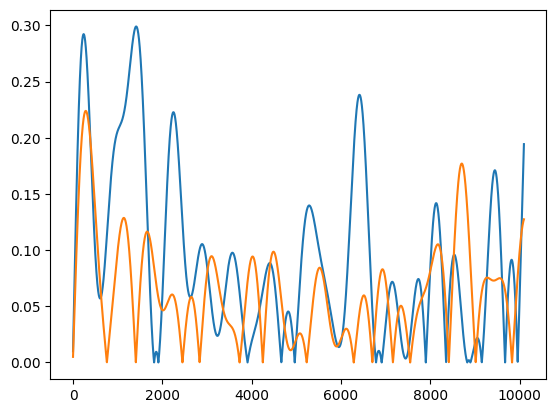

In [139]:
bts = varying_extForce(tend+1, t_step, 1, 0.01)
muts = varying_extForce(tend+1, t_step, 0.5, 0.01)

In [140]:
def epid_mod (t, u, fi, a, tend, t_step, btts, bts, muts):
    
    du = np.zeros([3, 1])
    
    S = u[0]
    I = u[1]
    R = u[2]
    
    from scipy.interpolate import interp1d
    xs = np.arange(len(btts))
    y_interp = interp1d(xs, btts)
    bT = y_interp(t/t_step)
    
    xs = np.arange(len(btts))
    y_interp = interp1d(xs, bts)
    bt = y_interp(t/t_step)
    
    xs = np.arange(len(muts))
    y_interp = interp1d(xs, muts)
    mut = y_interp(t/t_step)
    
    
    du[0] = bt - mut*S - fi*S - bT*S*I
    du[1] = -mut*I - a*I + bT*S*I
    du[2] = -mut*R + fi*S + a*I
    
    
    
    du = du.reshape(3,)
    return(du)


In [141]:
import timeit

tend = 100
t_step = 0.01
t_span = (0, tend)
u0= [1, 0.01, 0.01]
p = (0.07, 0.12, tend, t_step, btts, bts, muts)
start_time = timeit.default_timer()
epsl00 = solve_ivp (epid_mod, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


0.5804816829040647


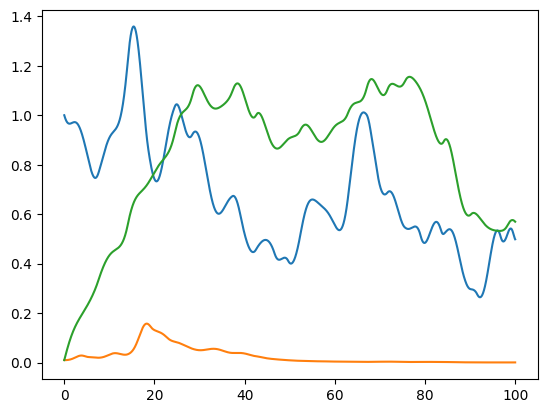

In [142]:
%matplotlib inline
plt.plot(epsl00.t, epsl00.y[0])
plt.plot(epsl00.t, epsl00.y[1])
plt.plot(epsl00.t, epsl00.y[2])

In [143]:
tend = 100
t_step = 0.01
t_span = (0, tend)
u0= [1, 0.01, 0.01]
p = (0.025, 0.08, tend, t_step, btts, bts, muts)
start_time = timeit.default_timer()
epsl01 = solve_ivp (epid_mod, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)


0.6286733379820362


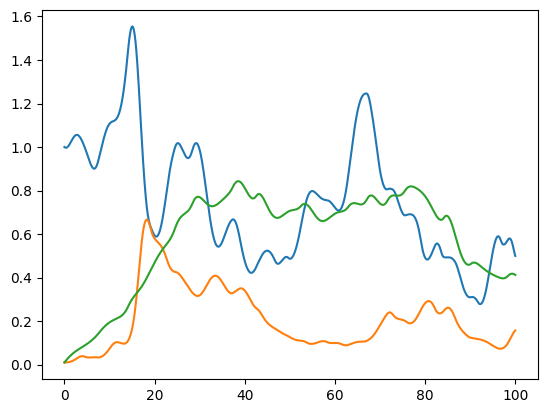

In [144]:
%matplotlib inline
plt.plot(epsl01.t, epsl01.y[0])
plt.plot(epsl01.t, epsl01.y[1])
plt.plot(epsl01.t, epsl01.y[2])

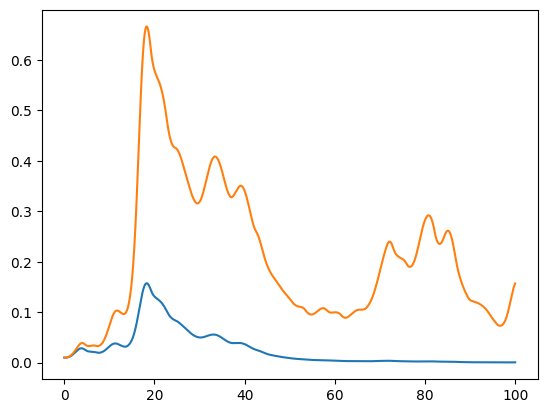

In [145]:
%matplotlib inline
plt.plot(epsl00.t, epsl00.y[1])
plt.plot(epsl01.t, epsl01.y[1])

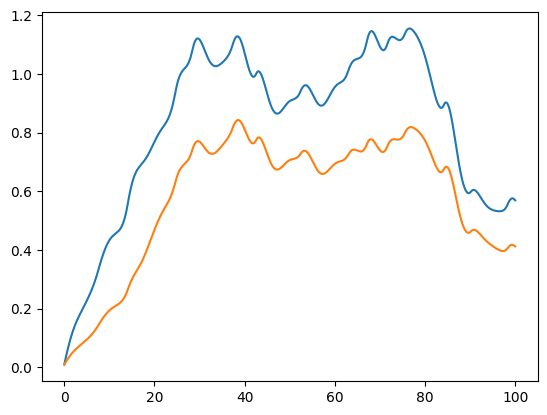

In [146]:
%matplotlib inline
plt.plot(epsl00.t, epsl00.y[2])
plt.plot(epsl01.t, epsl01.y[2])

In [147]:
hrsl = np.sum(epsl00.y, axis=0)
lrsl = np.sum(epsl01.y, axis=0)

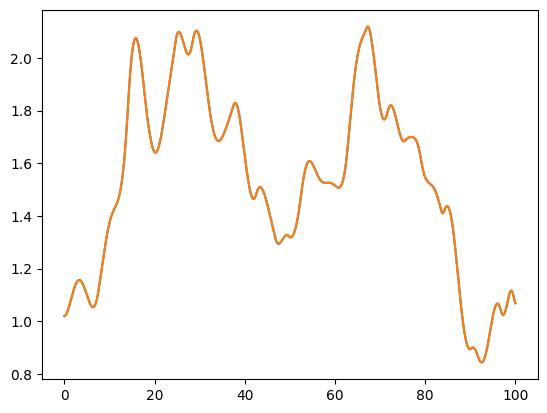

In [148]:
%matplotlib inline
plt.plot(epsl00.t, hrsl)
plt.plot(epsl00.t, lrsl)

## Interested only in the dynamics of Infected ##

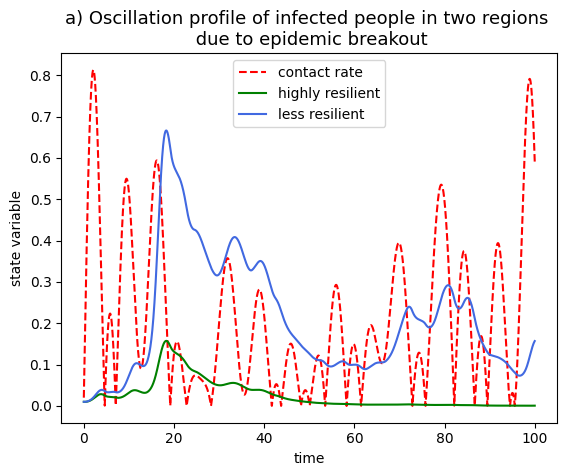

In [149]:
%matplotlib inline
plt.plot(epsl00.t, btts[0:10000], linestyle='--', color='red', label = 'contact rate')
plt.plot(epsl00.t, epsl00.y[1], color = 'green', label = "highly resilient")
plt.plot(epsl01.t, epsl01.y[1], color = 'royalblue', label = 'less resilient')
plt.ylabel('state variable'); plt.xlabel ("time")
plt.title("a) Oscillation profile of infected people in two regions \n due to epidemic breakout", fontsize =13)
plt.legend(fontsize=10)
plt.show()

0.6598604579921812
0.6893778850790113
0
0.6344650369137526
0.7501218810211867
1
0.6662371880374849
0.6889684869674966
2
0.7492136290529743
0.8502352200448513
3
0.6713439379818738
0.7354055519681424
4
0.6834565089084208
0.7944497249554843
5
0.7681510020047426
0.8184922459768131
6
0.6047433759085834
0.7423198380274698
7
0.6272681019036099
0.6615300519624725
8
0.7151425529737025
0.7877598769264296
9
0.7072779200971127
0.7489874589955434
10
0.6554696620441973
0.7474026830168441
11
0.7439379380084574
0.7551144700264558
12
0.6297867620596662
0.6889519159449264
13
0.5995163399493322
0.7909331989940256
14
0.638913567061536
0.6750628859736025
15
0.6324276620289311
0.7216357010183856
16
0.679442671011202
0.7745602190261707
17
0.7281305840006098
0.7933146430877969
18
0.6305006950860843
0.7432381440885365
19
0.7030833429889753
0.8446984880138189
20
0.7119112319778651
0.7582314409082755
21
0.6928190430626273
0.7140904670814052
22
0.6136212269775569
0.7134116350207478
23
0.6704861100297421
0.7891735

0.7837104619247839
0.8076680799713358
199
0.6878576539456844
0.9164889609673992
200
0.751023693010211
0.7519730849890038
201
0.7227266129339114
0.8220916389254853
202
0.7414515869459137
0.7815975359408185
203
0.6614973120158538
0.7293446089606732
204
0.7321177599951625
0.6951941290171817
205
0.6272939710179344
0.717473331023939
206
0.6756162280216813
0.7537769350456074
207
0.7567947281058878
0.8097624910296872
208
0.7292456879513338
0.8199136450421065
209
0.7854412100277841
0.7146876640617847
210
0.688015362014994
0.6882700349669904
211
0.6361288269981742
0.7211923589929938
212
0.7429974291007966
0.7623583980603144
213
0.7920203750254586
0.7826595549704507
214
0.7812179219909012
0.7228832839755341
215
0.6849111539777368
0.7989613059908152
216
0.6810964490287006
0.7582071979995817
217
0.7320699030533433
0.815555242006667
218
0.6867792089469731
0.7391053440514952
219
0.679216293967329
0.8095703619765118
220
0.6911779850488529
0.7921653250232339
221
0.8145556430099532
0.7581214809324592
2

0.6966827739961445
395
0.6694449239876121
0.728119952022098
396
0.6653757569147274
0.81502729607746
397
0.6662374919978902
0.6841635449090973
398
0.6561379600316286
0.7816226800205186
399
0.724139352911152
0.814831304945983
400
0.675684149027802
0.6595773299923167
401
0.6734900160226971
0.7471498770173639
402
0.6418061250587925
0.681644050986506
403
0.6406405990710482
0.6552632260136306
404
0.6971243530279025
0.7664734510472044
405
0.7162740679923445
0.7214255379512906
406
0.6863316149683669
0.7541658660629764
407
0.7535250280052423
0.7713726119836792
408
0.6499083660310134
0.7262788829393685
409
0.7676776690641418
0.7693388819461688
410
0.6309695109957829
0.6936507439240813
411
0.6649489960400388
0.6355947490083054
412
0.7132875280221924
0.6822974160313606
413
0.7171295189764351
0.7524945830227807
414
0.6947072519687936
0.7197953650029376
415
0.6569568000268191
0.7476950690615922
416
0.6708711209939793
0.7637730049900711
417
0.7538118941010907
0.7463346659205854
418
0.682629790971987


0.7115027869585901
0.748615983990021
592
0.6681231550173834
0.7192706490168348
593
0.7315984449815005
0.7434637059923261
594
0.6684043520363048
0.7431914660846815
595
0.6374205130850896
0.712448584032245
596
0.6618095129961148
0.7231242929119617
597
0.637117224978283
0.8113444459158927
598
0.6615924399811774
0.6661326609319076
599
0.7256992449983954
0.7522446219809353
600
0.7052848619641736
0.7768540990073234
601
0.6146365699823946
0.6513923269230872
602
0.6646602189866826
0.6754335790174082
603
0.6413720189593732
0.7888199399458244
604
0.6685234750621021
0.7601306069409475
605
0.7880709130549803
0.8073060320457444
606
0.6195585099048913
0.64880974101834
607
0.6389055110048503
0.7904020310379565
608
0.7574318890692666
0.8434407990425825
609
0.6600012870039791
0.650728584965691
610
0.7434957320801914
0.8573704360751435
611
0.64156105206348
0.698543853010051
612
0.6702182659646496
0.7723909610649571
613
0.6846198400016874
0.793126184027642
614
0.6779976889956743
0.7064960061106831
615
0.

0.8357648390810937
788
0.6726059090578929
0.6863423080649227
789
0.6628902069060132
0.7640625640051439
790
0.6849602760048583
0.8242596510099247
791
0.7181460220599547
0.6668102419935167
792
0.6661698679672554
0.7373263849876821
793
0.674181364942342
0.7658765290398151
794
0.6492450960213318
0.7604814099613577
795
0.6822715030284598
0.7791314859641716
796
0.6614934579702094
0.7122660590102896
797
0.7913236769381911
0.8132028710097075
798
0.6359609990613535
0.7516266340389848
799
0.6432680139550939
0.7442554730223492
800
0.7603502889396623
0.7673606539610773
801
0.6425705949077383
0.7634109730133787
802
0.6865641300100833
0.7351349230157211
803
0.6053218869492412
0.7135705630062148
804
0.6743099120212719
0.7133243560092524
805
0.7181853350484744
0.770583980018273
806
0.6198230679146945
0.6689394990680739
807
0.728641594061628
0.817726418026723
808
0.6152363100554794
0.7598726489813998
809
0.7230678960913792
0.8100156609434634
810
0.6580178469885141
0.7331960779847577
811
0.6084445059532

0.7550970941083506
0.8207011260092258
985
0.68195458909031
0.7807681079721078
986
0.6504776600049809
0.7289125389652327
987
0.6256631009746343
0.7270623398944736
988
0.7769170679384843
0.8093624679604545
989
0.6589946208987385
0.8029862589901313
990
0.6700336100766435
0.7337311690207571
991
0.6288381880149245
0.8068365850485861
992
0.6680450129788369
0.7640228479867801
993
0.7047851869137958
0.7398798780050129
994
0.7335412899265066
0.8086690430063754
995
0.7063868560362607
0.7889945970382541
996
0.6022021769313142
0.7183538300450891
997
0.7000565819907933
0.7693957439623773
998
0.6289998670108616
0.6679701650282368
999


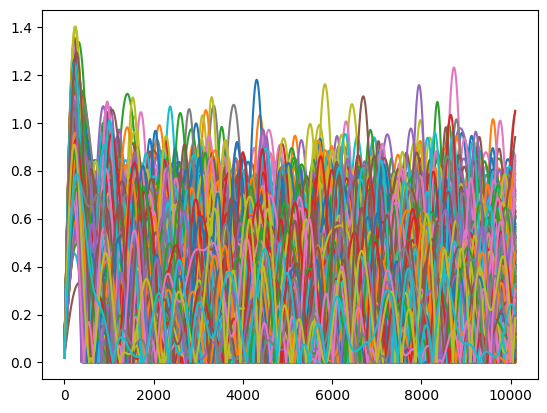

In [83]:
for i in np.arange(1000):

    btts= varying_extForce(tend+1, t_step, 2, 0.01)
    
    ##More resilient ## parameters varying are vaccination rate and recovery rate
    tend = 100
    t_step = 0.01
    t_span = (0, tend)
    u0= [1, 0.01, 0.01]
    p = (0.07, 0.12, tend, t_step, btts, bts, muts)
    start_time = timeit.default_timer()
    epsl00 = solve_ivp (epid_mod, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)
    
    ##Less resilient
    tend = 100
    t_step = 0.01
    t_span = (0, tend)
    u0= [1, 0.01, 0.01]
    p = (0.025, 0.08, tend, t_step, btts, bts, muts)
    start_time = timeit.default_timer()
    epsl01 = solve_ivp (epid_mod, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)


    id ='{0:04}'.format(i)
    sdms_df = pd.DataFrame({'low': epsl01.y[1], 'high' : epsl00.y[1]})
    fnm = "/home/karthik/jupyter_dir/SDMS/epidemic_model/simu_" + id + ".csv"
    sdms_df.to_csv(fnm)
    print(i)

In [85]:
import import_ipynb
%run /home/karthik/jupyter_dir/SDMS/IRI_calc.ipynb

In [86]:
def extremums(ts):
    
    from scipy.signal import argrelextrema

    fitt = ts

    maxs = np.array(argrelextrema(np.array(fitt), np.greater))
    mins = np.array(argrelextrema(np.array(fitt), np.less))
    pks = np.concatenate(([0], maxs.ravel(), mins.ravel(), [9999]))
    pks1 = np.sort(pks)
    
    cyc_pks1 = np.concatenate(([0], mins.ravel(), [9999]))
    
    return([pks1, cyc_pks1])

In [88]:
import os
fls1 = os.listdir('/home/karthik/jupyter_dir/SDMS/epidemic_model/')
fls = list(filter(lambda f:f.endswith('.csv'), fls1))
len(fls)

1000

In [89]:
def extremums(ts):
    
    from scipy.signal import argrelextrema

    fitt = ts

    maxs = np.array(argrelextrema(np.array(fitt), np.greater))
    mins = np.array(argrelextrema(np.array(fitt), np.less))
    pks = np.concatenate(([0], maxs.ravel(), mins.ravel(), [9999]))
    pks1 = np.sort(pks)
    
    cyc_pks1 = np.concatenate(([0], mins.ravel(), [9999]))
    
    return([pks1, cyc_pks1])

In [90]:
beta_Frrts =np.zeros([1,7])

for i in np.arange(len(fls)):
    
    df0 = pd.read_csv('ecological_model/' + fls[i])
    df0 = df0.rename(columns = {'Unnamed: 0':'id'})
    
    df = df0.iloc[500:,:] 
    
    leco = resilience_calc_func(np.array(df.low))
    heco = resilience_calc_func(np.array(df.high))
    
    rrts0 = np.vstack((leco, heco))
    beta_Frrts = np.vstack((beta_Frrts, rrts0))

    print(i)

[  nan  329.  198.  218.  187.  173.  145.  106.  320.   35.  119.  116.
   nan   nan  391.  601.  512.  492.  563.  615. 1063.  375.  765.  885.]
[  35.  106.  116.  119.  145.  173.  187.  198.  218.  320.  329.  375.
  391.  492.  512.  563.  601.  615.  765.  885. 1063.]
[ 22. 115. 215.  nan 180.  nan 160. 159. 137.  nan 106. 360. 186. 143.
  nan 120. 308. 291. 402.  nan 549.  nan 473. 464. 488.  nan 543. 975.
 354. 634.  nan 802.]
[ 22. 106. 115. 120. 137. 143. 159. 160. 180. 186. 215. 291. 308. 354.
 360. 402. 464. 473. 488. 543. 549. 634. 802. 975.]
0
[351.  68.  nan 533. 216. 167.  nan  nan  nan  nan 157.  92. 449. 207.
  41.  84.  nan  nan  nan  nan  nan 168.  nan  nan  nan  nan 756.  nan
  nan 887. 390. 244.]
[ 41.  68.  84.  92. 157. 167. 168. 207. 216. 244. 351. 390. 449. 533.
 756. 887.]
[ 83. 112.  51.  54.  nan 176.  nan  nan  nan  nan  nan  nan  nan 130.
 159.  71.  nan 194. 116. 163. 343. 482. 456. 453.  nan 557.  nan  nan
  nan  nan  nan  nan  nan 659. 610. 392.  nan 

[  nan  210.  332.  125.  725.   91.   80.   nan   nan  112.   94. 1055.
  185.   nan  571.  419.   nan   nan  396. 1022.   nan   nan  734.   nan
   nan   nan]
[  80.   91.   94.  112.  125.  185.  210.  332.  396.  419.  571.  725.
  734. 1022. 1055.]
[ nan  nan 174. 393. 139.  95. 166. 118. 305.  nan 122. 141.  75. 258.
  nan 176.  nan  nan 490. 413. 501. 659. 380. 941. 345.  nan 653. 459.
  nan  nan  nan 567.]
[ 75.  95. 118. 122. 139. 141. 166. 174. 176. 258. 305. 345. 380. 393.
 413. 459. 490. 501. 567. 653. 659. 941.]
16
[ 40.  76.  78.  77.  nan 403. 167. 153. 296.  nan 289. 146. 307.  74.
 310. 298. 348. 232. 533.  nan  nan  nan 514.  nan  nan  nan 373.  nan
  nan 510. 402. 391.]
[ 40.  74.  76.  77.  78. 146. 153. 167. 232. 289. 296. 298. 307. 310.
 348. 373. 391. 402. 403. 510. 514. 533.]
[134. 113.  85. 129.  71.  87. 191. 135.  96.  nan 234. 136. 538. 104.
  98.  nan 225. 263. 363. 233. 455. 412. 388. 358. 484. 528. 284.  nan
 414.  nan  nan 303. 469.  nan 420. 434.]
[ 71. 

[357.  nan 134. 101. 139. 128.  78.  70. 436. 103.  nan  nan 174.  98.
 120.  nan 130.  91. 777.  nan 453. 274. 677. 322. 577.  nan  nan 332.
  nan  nan 284. 401. 399.  nan 344.  nan]
[ 70.  78.  91.  98. 101. 103. 120. 128. 130. 134. 139. 174. 274. 284.
 322. 332. 344. 357. 399. 401. 436. 453. 577. 677. 777.]
31
[776.  98.  81.  nan 506.  73.  nan  nan  nan 109.  nan  nan 151.  78.
  nan  nan  nan 161.  nan 730.  nan  nan  nan 305.  nan  nan  nan  nan
  nan  nan  nan 520.  nan  nan  nan 413.]
[ 73.  78.  81.  98. 109. 151. 161. 305. 413. 506. 520. 730. 776.]
[ 90. 183. 159. 103. 148. 161.  nan  nan  nan  nan  99.  67.  61.  nan
 103.  nan  nan  nan 145. 700. 677. 480. 812. 485. 270.  nan  nan  nan
  nan 392. 317. 393.  nan 452.  nan  nan  nan 368.]
[ 61.  67.  90.  99. 103. 103. 145. 148. 159. 161. 183. 270. 317. 368.
 392. 393. 452. 480. 485. 677. 700. 812.]
32
[ 65.  35. 110.  nan  nan 247. 237.  81.  74.  37.  84. 358.  23. 153.
 584. 447. 357. 751.  nan  nan 934. 528. 310. 456. 22

[ 86. 204.  nan  nan  nan 148. 104. 103.  43. 215. 103. 104. 100. 158.
 364.  71. 109.  55.  nan 232.  nan  nan  nan  nan  nan 373. 249. 312.
  nan  nan 351. 390. 561.  nan  nan 224. 316. 573.  nan 457.]
[ 43.  55.  71.  86. 100. 103. 103. 104. 104. 109. 148. 158. 204. 215.
 224. 232. 249. 312. 316. 351. 364. 373. 390. 457. 561. 573.]
[111.  nan  nan  nan  nan 126. 128. 110.  70. 105. 122. 125. 123. 181.
  87. 133. 114.  78.  nan  nan 196. 596.  nan  nan  nan  nan 352. 245.
 299. 469. 204. 335. 369. 512. 532. 335. 219. 304. 463.  nan  nan 441.]
[ 70.  78.  87. 105. 110. 111. 114. 122. 123. 125. 126. 128. 133. 181.
 196. 204. 219. 245. 299. 304. 335. 335. 352. 369. 441. 463. 469. 512.
 532. 596.]
47
[  nan   nan  607.   nan  212.  221.  115.  321.   97.  207.  584.   nan
  311.   nan   nan   nan   nan  491.  408.  408. 1071.  811.   nan   nan
   nan  682.]
[  97.  115.  207.  212.  221.  311.  321.  408.  408.  491.  584.  607.
  682.  811. 1071.]
[  nan  569.  129.   nan  173.  221.  1

[ 33.  nan  nan 210.  nan  nan 425.  67. 132. 105.  76.  nan  nan  nan
 115.  46.  67.  76. 431.  nan  nan  nan  nan  nan  nan 206. 297. 345.
 892.  nan  nan  nan 408. 299. 401. 237.]
[ 33.  46.  67.  67.  76.  76. 105. 115. 132. 206. 210. 237. 297. 299.
 345. 401. 408. 425. 431. 892.]
[ 41. 105.  nan  nan 172.  45.  41. 129.  nan 137. 119. 107.  nan  nan
 195. 113. 107.  99. 171.  nan 178. 386.  nan  nan 669. 361. 561. 411.
  nan 286. 321. 817.  nan  nan 297. 365. 278. 357. 203.  nan]
[ 41.  41.  45.  99. 105. 107. 107. 113. 119. 129. 137. 171. 172. 178.
 195. 203. 278. 286. 297. 321. 357. 361. 365. 386. 411. 561. 669. 817.]
63
[  85.  198.  282.  285.  128.  412.   nan  266.  165.   nan   nan  370.
   64.  756.  449.  487.  866.   nan   nan   nan 1036.   nan   nan   nan
   nan   nan]
[  64.   85.  128.  165.  198.  266.  282.  285.  370.  412.  449.  487.
  756.  866. 1036.]
[ nan 111. 245. 268. 368. 172. 128.  nan 234. 194.  61.  66.  97. 123.
  nan 664. 444. 472. 887. 600. 354.  na

[553.  nan 184. 112. 123.  81.  64.  nan  nan  nan  nan  nan 120. 197.
  nan  nan  96.  78.  nan 226. 177.  nan  nan 419. 265. 223. 396. 328.
  nan  nan  nan  nan  nan 692. 495.  nan  nan 579. 404.  nan 458. 435.]
[ 64.  78.  81.  96. 112. 120. 123. 177. 184. 197. 223. 226. 265. 328.
 396. 404. 419. 435. 458. 495. 553. 579. 692.]
78
[442. 110.  nan 187. 316.  50. 118. 291. 427.  56.  92. 690. 231.  nan
  nan  nan 121.  nan  nan  nan 337. 687.  nan  nan 516.  nan  nan 557.
  nan  nan]
[ 50.  56.  92. 110. 118. 121. 187. 231. 291. 316. 337. 427. 442. 516.
 557. 687. 690.]
[114.  nan  nan  nan 153.  81. 103.  nan 105.  nan 310. 137. 101. 162.
 618. 246.  nan  nan 423.  nan  nan  nan 510. 287. 312.  nan 580.  nan
 944. 428. 466.  nan 619. 564.  nan  nan]
[ 81. 101. 103. 105. 114. 137. 153. 162. 246. 287. 310. 312. 423. 428.
 466. 510. 564. 580. 618. 619. 944.]
79
[380.  nan 170. 373. 106. 211. 172. 102.  nan 193.  57. 169.  nan  nan
 470.  nan  nan  nan  nan 276. 886. 239. 582.  nan 522. 3

[ nan  nan 548.  nan 105. 107.  nan  nan 180.  nan  76.  55. 136. 159.
 538.  nan  nan  nan  nan  nan 636.  nan  nan  nan  nan  nan 461. 482.
 509. 526. 708.  nan]
[ 55.  76. 105. 107. 136. 159. 180. 461. 482. 509. 526. 538. 548. 636.
 708.]
[532.  85. 482.  nan  94.  nan 121.  86.  83.  nan  nan 126.  99.  nan
 135.  nan 155.  nan 532.  nan  nan  nan  nan  nan 486.  nan 376. 301.
 504.  nan  nan 396. 421.  nan 458.  nan 479.  nan 713.  nan]
[ 83.  85.  86.  94.  99. 121. 126. 135. 155. 301. 376. 396. 421. 458.
 479. 482. 486. 504. 532. 532. 713.]
94
[ nan 301. 222.  nan  nan 157. 147. 344.  nan 136. 132. 149. 155. 470.
  nan  nan 585. 599.  nan  nan 503.  nan  nan  nan 581. 576. 440.  nan
  nan  nan]
[132. 136. 147. 149. 155. 157. 222. 301. 344. 440. 470. 503. 576. 581.
 585. 599.]
[  nan   nan  249.  243.   nan   nan  142.  157.   78.   nan  135.  195.
  181.  182.   78.   nan   nan   nan  521.  570.   nan   nan  446.  698.
  313.   nan  521.  548.  417. 1081.  412.   nan]
[  78.   7

[ nan 359.  nan 160.  51.  nan 221.  nan 415. 560.  nan  nan 218.  nan
  nan  nan  nan  nan 411. 662.  nan 567.  nan  nan  nan  nan  nan  nan
  nan  nan]
[ 51. 160. 218. 221. 359. 411. 415. 560. 567. 662.]
[124. 113.  nan 153.  93.  nan  nan 193.  nan  nan  98.  95.  nan  nan
 219.  67.  76. 529. 324.  nan 377. 542.  nan  nan 499.  nan  nan 803.
 500.  nan  nan 587. 516.  nan]
[ 67.  76.  93.  95.  98. 113. 124. 153. 193. 219. 324. 377. 499. 500.
 516. 529. 542. 587. 803.]
110
[  75.  196.   nan  125.   60.   nan  186.  279.   69.   nan   nan  289.
  471.  349.   nan  627.  666.   nan  709. 1459.  688.   nan   nan 1031.]
[  60.   69.   75.  125.  186.  196.  279.  289.  349.  471.  627.  666.
  688.  709. 1031. 1459.]
[121.  nan 187.  nan  nan 110. 133.  nan 195.  nan 261. 695.  nan  90.
  nan  nan 256. 415.  nan 318.  nan  nan 515. 611.  nan 646.  nan  nan
  nan  nan 593.  nan  nan 926.]
[ 90. 110. 121. 133. 187. 195. 256. 261. 318. 415. 515. 593. 611. 646.
 695. 926.]
111
[110.  50. 

[ nan 543. 278.  98.  nan  nan  nan  nan  nan  nan 168.  nan 135.  95.
 483. 129.  74.  nan  nan  nan  nan 569. 405.  nan  nan  nan  nan  nan
  nan 345.  nan 491.  nan  nan 419. 583.  nan  nan]
[ 74.  95.  98. 129. 135. 168. 278. 345. 405. 419. 483. 491. 543. 569.
 583.]
125
[ nan 366.  18. 157.  nan 162. 195. 171.  59. 171.  44. 170.  66. 155.
  nan  nan  nan  nan  nan 418. 420.  nan 357. 315. 661. 414. 959. 728.
  nan  nan 310.  nan  nan  nan]
[ 18.  44.  59.  66. 155. 157. 162. 170. 171. 171. 195. 310. 315. 357.
 366. 414. 418. 420. 661. 728. 959.]
[311.  92.  85.  nan 143.  nan 144. 199. 202. 232. 219.  97. 211.  nan
 149.  nan  nan  nan  nan 328. 374.  nan 387.  nan 338. 289. 528. 332.
 939. 653. 671.  nan 305.  nan  nan  nan]
[ 85.  92.  97. 143. 144. 149. 199. 202. 211. 219. 232. 289. 305. 311.
 328. 332. 338. 374. 387. 528. 653. 671. 939.]
126
[ 90.  nan 518.  36.  nan 117. 153. 175.  nan  nan 286.  30. 352.  nan
 121. 470. 142.  14.  nan  nan  nan 424.  nan  nan  nan 458.  nan

[150. 150.  nan  nan  nan 174.  nan  nan 364.  nan 232. 126. 671. 562.
  nan  nan  nan  nan  nan  nan 365.  nan 683. 702.]
[126. 150. 150. 174. 232. 364. 365. 562. 671. 683. 702.]
[219. 180. 170.  nan  nan  nan  nan 249.  nan 154. 240. 630. 123. 136.
  nan 208. 153.  nan 636. 525.  nan  nan  nan  nan 377.  nan 629. 241.
  nan 769. 348.  nan 613. 640.]
[123. 136. 153. 154. 170. 180. 208. 219. 240. 241. 249. 348. 377. 525.
 613. 629. 630. 636. 640. 769.]
140
[ nan 304. 211.  nan 156. 341. 111.  58. 591.  65.  59.  92. 249.  nan
 791. 770.  nan  nan  nan 387.  nan  nan 756. 327.  nan  nan]
[ 58.  59.  65.  92. 111. 156. 211. 249. 304. 327. 341. 387. 591. 756.
 770. 791.]
[ nan 303.  nan 182.  nan  nan 138. 323. 143.  93. 120. 125. 197. 110.
 164.  nan 720.  nan 690.  nan  nan  nan  nan 371. 592. 556. 627. 332.
 536. 216.]
[ 93. 110. 120. 125. 138. 143. 164. 182. 197. 216. 303. 323. 332. 371.
 536. 556. 592. 627. 690. 720.]
141
[ 89. 108.  nan  nan 206.  76.  nan 409.  nan 247.  nan 462.  

[ 198.   93.   nan   nan   nan  731.  175.   nan  217.  292.  507.   nan
 1019.  707.   nan   nan   nan  793.  499.   nan  808.  706. 1105.   nan]
[  93.  175.  198.  217.  292.  499.  507.  706.  707.  731.  793.  808.
 1019. 1105.]
155
[365. 102.  34. 283.  67. 195.  14. 163. 227.  nan  nan 702. 765. 906.
 756. 708. 915. 690. 772.  nan]
[ 14.  34.  67. 102. 163. 195. 227. 283. 365. 690. 702. 708. 756. 765.
 772. 906. 915.]
[341. 160. 126. 335. 310. 106.  nan 175. 121. 176. 356.  nan  nan  nan
  nan 642. 630.  nan  nan 669.  nan 609. 759. 620. 825.  nan  nan  nan]
[106. 121. 126. 160. 175. 176. 310. 335. 341. 356. 609. 620. 630. 642.
 669. 759. 825.]
156
[  nan  559.  100.  238.   nan   nan  221.   nan  177.  220.  421.   nan
   nan 1591. 1398.   nan   nan  577.   nan  531.  491.  903.]
[ 100.  177.  220.  221.  238.  421.  491.  531.  559.  577.  903. 1398.
 1591.]
[  nan  500.  250.  290.   nan   nan  237.   nan  239.  275.  610.   nan
   nan 1469. 1337.   nan   nan  544.   nan  456

[1111.  249.  103.   26.  105.   nan   nan  216.   67.  103.   73.   57.
   nan  160.   60.   26.  100.   nan  354.  356.  592.  586.   nan   nan
  360.  559.  725.  581.  300.   nan  379.  409.  292.   nan]
[  26.   26.   57.   60.   67.   73.  100.  103.  103.  105.  160.  216.
  249.  292.  300.  354.  356.  360.  379.  409.  559.  581.  586.  592.
  725. 1111.]
[  86.  234.  117.   77.   nan  120.   nan   nan   nan  169.   88.   nan
  117.  177.   nan   nan  144.   99.  120.  145. 1037.  366.  318.  456.
   nan  520.   nan   nan   nan  334.  461.   nan  613.  479.   nan   nan
  348.  347.  261.  146.]
[  77.   86.   88.   99.  117.  117.  120.  120.  144.  145.  146.  169.
  177.  234.  261.  318.  334.  347.  348.  366.  456.  461.  479.  520.
  613. 1037.]
171
[ nan 349.  nan  nan  nan 199.  nan  nan 396.  nan 149. 163. 947. 141.
  nan 167.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 471.
  nan  nan 435.  nan 390.  nan]
[141. 149. 163. 167. 199. 349. 390. 396. 435. 471

[ nan 550.  nan 158.  nan  91.  50.  nan  nan  nan 172.  nan  nan  nan
  97.  nan  nan  nan 538.  nan  nan 551.  nan 287.  nan 363. 456.  nan
  nan  nan 253.  nan  nan  nan 616.  nan  nan  nan 893.  nan]
[ 50.  91.  97. 158. 172. 253. 287. 363. 456. 538. 550. 551. 616. 893.]
186
[  73.  229.   79.   nan  485.   nan   nan   nan  417.   nan  217.  109.
  380.   84.   nan   nan   nan   nan   nan   nan   nan   nan 1424.   nan
  313.   nan   nan  276.]
[  73.   79.   84.  109.  217.  229.  276.  313.  380.  417.  485. 1424.]
[  nan  116.   nan  104.   72.  113.   nan   nan   nan  422.  362.  214.
  118.  114.  157.   nan  521.   nan  549.  505.  437.   nan   nan   nan
 1324.  423.  300.  532.  346.  260.]
[  72.  104.  113.  114.  116.  118.  157.  214.  260.  300.  346.  362.
  422.  423.  437.  505.  521.  532.  549. 1324.]
187
[280.  85. 436.  nan  nan 184. 261. 120.  nan 443. 193.  49. 328.  nan
 357.  nan  nan  nan  nan 844. 311.  nan  nan  nan 435.  nan  nan  nan]
[ 49.  85. 120. 184.

[ nan 205.  85.  59. 197.  78.  nan  nan  nan 164. 129.  nan  nan 108.
 469. 118. 111. 408. 249.  nan 339. 484. 423. 352. 581.  nan  nan  nan
 399. 320.  nan  nan 594. 566. 546. 357. 834. 289.]
[ 59.  78.  85. 108. 111. 118. 129. 164. 197. 205. 249. 289. 320. 339.
 352. 357. 399. 408. 423. 469. 484. 546. 566. 581. 594. 834.]
201
[  nan  231.  204.  431.   37.  497.  133.  231.   nan   nan  373.   80.
  202.   nan 1152.   nan   nan   nan   nan  429.   nan   nan   nan   nan
  435.   nan]
[  37.   80.  133.  202.  204.  231.  231.  373.  429.  431.  435.  497.
 1152.]
[ nan  nan  nan 192. 237. 200.  86. 109. 134. 174.  nan 194.  83.  87.
 108. 124.  nan 178.  nan  nan  nan  nan  nan 696. 389. 535. 480. 390.
  nan 617. 423. 409. 347. 398.  nan  nan]
[ 83.  86.  87. 108. 109. 124. 134. 174. 178. 192. 194. 200. 237. 347.
 389. 390. 398. 409. 423. 480. 535. 617. 696.]
202
[ 12. 265.  nan 189. 240.  nan 142.  nan  nan  nan 458. 143. 219. 218.
  nan  nan  nan 764. 572.  nan  nan  nan  nan  nan 

[331.  nan 168. 379. 132.  19.  39.  nan 141.  nan  nan 176.  99. 116.
  nan  nan  nan  nan  nan 118.  78.  nan  nan 792. 520. 655. 343. 449.
  nan 379.  nan  nan 312. 399. 349.  nan  nan  nan  nan  nan 397.  nan]
[ 19.  39.  78.  99. 116. 118. 132. 141. 168. 176. 312. 331. 343. 349.
 379. 379. 397. 399. 449. 520. 655. 792.]
217
[ 63. 140.  nan  nan 511.  nan 261. 477. 170.  nan  nan 367.  15.  47.
 516.  nan  nan  nan  nan  nan 402. 989. 602.  nan  nan 880. 571.  nan]
[ 15.  47.  63. 140. 170. 261. 367. 402. 477. 511. 516. 571. 602. 880.
 989.]
[159. 156.  64.  56. 457.  nan  nan 255. 568. 205.  nan  nan 365. 115.
 149. 494. 536. 385.  nan  nan  nan  nan 336. 953. 559.  nan  nan 811.
 504.  nan]
[ 56.  64. 115. 149. 156. 159. 205. 255. 336. 365. 385. 457. 494. 504.
 536. 559. 568. 811. 953.]
218
[ nan 549. 112.  nan 141.  nan  nan  nan  nan 221.  nan 103.  39.  45.
  57.  nan  nan  nan 725.  nan 567.  nan  nan  nan  nan 950.  nan 947.
 577. 330.  nan  nan]
[ 39.  45.  57. 103. 112. 14

[ nan 258.  nan  nan  nan 208. 734. 238. 267.  nan 308.  nan  nan 200.
 393.  84.  nan  nan  nan  nan  nan  nan  nan 543.  nan  nan  nan  nan
  nan  nan  nan 353.]
[ 84. 200. 208. 238. 258. 267. 308. 353. 393. 543. 734.]
[486.  nan  nan  nan  nan 213. 638.  nan 250.  nan 239. 628. 143.  nan
  nan 172.  56. 144.  nan  nan  nan  nan  nan  nan  nan  nan 448.  nan
  nan  nan 268.  nan  nan 650. 352. 324.]
[ 56. 143. 144. 172. 213. 239. 250. 268. 324. 352. 448. 486. 628. 638.
 650.]
232
[ nan 352. 152.  nan 639. 155. 224. 187. 144.  nan  nan 130.  nan 183.
 178. 557.  nan  nan  nan  nan  nan 367. 303. 519. 628.  nan  nan 935.
  nan 438.  nan  nan]
[130. 144. 152. 155. 178. 183. 187. 224. 303. 352. 367. 438. 519. 557.
 628. 639. 935.]
[341.  95. 176. 102. 547. 170.  nan 200. 190. 165.  nan  nan 111.  nan
  nan 161. 174. 477.  nan 309. 461.  nan  nan 346.  nan 281. 485. 569.
  nan  nan 647.  nan  nan 390.  nan  nan]
[ 95. 102. 111. 161. 165. 170. 174. 176. 190. 200. 281. 309. 341. 346.
 390. 

[ nan  nan  93.  56. 214. 150.  nan 131.  nan 176. 380. 195.  74.  nan
  nan  nan 694. 334. 978. 723.  nan 780.  nan  nan  nan 750. 401.  nan]
[ 56.  74.  93. 131. 150. 176. 195. 214. 334. 380. 401. 694. 723. 750.
 780. 978.]
[ nan  nan  nan  91. 196. 225.  nan 144.  nan 141.  nan  nan 178. 121.
 232. 144.  nan  nan  nan  nan 551. 320. 938.  nan 652.  nan 660.  nan
  nan 667. 346. 729. 374.  nan]
[ 91. 121. 141. 144. 144. 178. 196. 225. 232. 320. 346. 374. 551. 652.
 660. 667. 729. 938.]
248
[ 570.  564.   nan  325.  197.  137.  477.   nan  147.   nan  164.   95.
  144.   nan  995.   nan 1122.  507.   nan   nan   nan  654.   nan  745.
  276.   nan]
[  95.  137.  144.  147.  164.  197.  276.  325.  477.  507.  564.  570.
  654.  745.  995. 1122.]
[  78.  704.   nan  296.  226.  160.  170.   nan  151.   nan  153.   nan
  156.  523. 1047.   nan 1045.  490.  785.  455.   nan  602.   nan  678.
   nan   nan]
[  78.  151.  153.  156.  160.  170.  226.  296.  455.  490.  523.  602.
  678.  704

[420.  nan 222.  nan 207.  74. 760. 306. 270. 184. 933. 115. 832.  nan
 453.  nan 495.  nan  nan 841. 337.  nan  nan 594.]
[ 74. 115. 184. 207. 222. 270. 306. 337. 420. 453. 495. 594. 760. 832.
 841. 933.]
[ nan 462.  nan 197.  nan 186. 109.  78.  nan 299.  nan 244. 200. 102.
 143.  nan 815.  nan 412.  nan 455. 694. 675.  nan 790.  nan 316. 620.
 833. 543.]
[ 78. 102. 109. 143. 186. 197. 200. 244. 299. 316. 412. 455. 462. 543.
 620. 675. 694. 790. 815. 833.]
263
[ 33. 565.  nan 149. 134. 160. 111.  nan 350.  nan  nan  nan 192.  nan
  nan  nan  nan  nan 685. 336. 542. 713.  nan 865.  nan  nan  nan  nan
  nan  nan]
[ 33. 111. 134. 149. 160. 192. 336. 350. 542. 565. 685. 713. 865.]
[ 97.  46.  nan  nan 121. 212. 163. 137.  nan  nan 293.  nan  nan  nan
 152. 121. 100. 416. 433.  nan  nan 568. 361. 502. 630.  nan  nan 781.
  nan  nan  nan 725. 374. 458.]
[ 46.  97. 100. 121. 121. 137. 152. 163. 212. 293. 361. 374. 416. 433.
 458. 502. 568. 630. 725. 781.]
264
[ nan 218. 179. 111.  10.  31. 

[  5.  nan 507.  nan 167. 169. 110. 258. 182.  nan 385.  nan 216.  nan
  nan  nan  nan  nan  nan  nan 504. 607. 262. 590. 183.  nan  nan  nan
 561.  nan  nan  nan]
[  5. 110. 167. 169. 182. 183. 216. 258. 262. 385. 504. 507. 561. 590.
 607.]
[135.  81.  89.  nan 141. 183.  nan 260. 167.  70. 139.  nan 197.  nan
  nan  nan 598. 673. 452.  nan 444. 567.  nan 532. 558. 511. 373.  nan
 498.  nan  nan  nan]
[ 70.  81.  89. 135. 139. 141. 167. 183. 197. 260. 373. 444. 452. 498.
 511. 532. 558. 567. 598. 673.]
279
[ 555.   nan   nan  170.   nan  407.  582.   nan  586.   nan  229.  109.
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan 1321.  820.]
[ 109.  170.  229.  407.  555.  582.  586.  820. 1321.]
[ 123.   nan   nan  151.   93.  158.   nan  243.  147.  150.   nan  204.
  184.  512.   nan   nan  457.  478.  333.   nan  693.  841.  515.   nan
 1097.  773.]
[  93.  123.  147.  150.  151.  158.  184.  204.  243.  333.  457.  478.
  512.  515.  693.  773.  841. 1097.]
280
[ nan 232

[  36.  303.   nan   nan  161.   nan  143.  984.  296.  553.  172.   nan
   nan   nan   nan 1017.   nan   nan   nan   nan   nan  701.]
[  36.  143.  161.  172.  296.  303.  553.  701.  984. 1017.]
[171.  nan  nan  nan 140.  nan 126. 115. 387.  nan  nan  nan 250.  93.
 261.  nan 474.  nan  nan  nan 821.  nan 579.  nan  nan  nan  nan  nan
 659. 491. 695.  nan]
[ 93. 115. 126. 140. 171. 250. 261. 387. 474. 491. 579. 659. 695. 821.]
295
[  nan   nan  375.   68.  366.   27.   nan   nan  292.   nan   nan  177.
   nan  230.   nan   nan  151.  186.   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan  584.   nan 1018.   nan   nan  579.  610.]
[  27.   68.  151.  177.  186.  230.  292.  366.  375.  579.  584.  610.
 1018.]
[ 28.  80. 119. 109.  96.  92.  92.  65. 104.  nan  nan 152.  nan 229.
  nan  nan  nan 130. 206. 295. 431. 350. 467. 327. 358. 288. 559. 263.
  nan  nan 524.  nan 969.  nan  nan  nan 511. 585.]
[ 28.  65.  80.  92.  92.  96. 104. 109. 119. 130. 152. 206. 229. 26

[ 51.  84.  70.  82. 113. 124. 243.  nan  nan  nan 142. 274.  nan 268.
  nan 137. 249. 450. 419. 414. 355. 483. 693.  nan  nan  nan 908. 426.
  nan 602.  nan  nan]
[ 51.  70.  82.  84. 113. 124. 137. 142. 243. 249. 268. 274. 355. 414.
 419. 426. 450. 483. 602. 693. 908.]
310
[ nan  nan 604. 111. 476.  nan 224.  89.  nan 175.  81.  nan 212.  nan
  nan 101.  46.  55.  nan  nan  nan  nan  nan  nan 286. 470.  nan 465.
 263.  nan 582.  nan  nan 754. 669.  nan]
[ 46.  55.  81.  89. 101. 111. 175. 212. 224. 263. 286. 465. 470. 476.
 582. 604. 669. 754.]
[ 47.  78.  73.  65.  nan 126.  81.  nan  nan 160.  93.  nan  nan 140.
 156.  nan 191.  nan  nan  nan  82.  nan  85.  nan  83. 124. 363. 225.
 434.  nan 461. 434.  nan  nan 292. 403.  nan  nan 417. 233.  nan 539.
  nan  nan  nan 541.  nan 439.  nan 432.]
[ 47.  65.  73.  78.  81.  82.  83.  85.  93. 124. 126. 140. 156. 160.
 191. 225. 233. 292. 363. 403. 417. 432. 434. 434. 439. 461. 539. 541.]
311
[ 60. 118. 251.  nan 224.  nan  nan 260. 116.

[506. 286. 263. 123. 278.  80. 325. 291. 686.  17. 193.  nan 469. 684.
 374. 477.  nan  nan  nan  nan 758. 576.]
[ 17.  80. 123. 193. 263. 278. 286. 291. 325. 374. 469. 477. 506. 576.
 684. 686. 758.]
[473.  nan 265. 266. 208.  nan 251. 104.  nan 323. 137. 109. 258.  nan
  nan  nan 410. 648. 323.  nan 447. 710.  nan 682. 621. 670. 568.  nan]
[104. 109. 137. 208. 251. 258. 265. 266. 323. 323. 410. 447. 473. 568.
 621. 648. 670. 682. 710.]
326
[ nan  nan 160. 539.  nan 269.  nan 126.  25. 159. 111.  58. 395. 206.
 159.  96. 221.  nan 115.  nan  nan  nan  nan  nan 506.  nan 381.  nan
  nan 282.  nan  nan  nan  nan 460. 699.  nan  nan]
[ 25.  58.  96. 111. 115. 126. 159. 159. 160. 206. 221. 269. 282. 381.
 395. 460. 506. 539. 699.]
[ nan  nan  nan 131. 460.  nan 255.  nan 113.  72.  nan 118.  75.  74.
  nan 185.  nan 107. 202.  nan 101.  nan  nan  nan  nan  nan  nan 512.
  nan 348. 399.  nan 279. 419. 349.  nan 601.  nan 417. 638.  nan  nan]
[ 72.  74.  75. 101. 107. 113. 118. 131. 185. 20

[ 405.   nan   nan   nan   nan   nan   nan  127.  198.  269.   nan  154.
   nan   nan   nan   nan   nan   nan   nan  836.  983. 1626.   nan  620.]
[ 127.  154.  198.  269.  405.  620.  836.  983. 1626.]
[ 186.   nan   nan   nan   nan   nan   nan  129.   nan  198.  365.   nan
  162.  343.   nan   nan   nan   nan   nan   nan  681.   nan  846. 1518.
   nan  520.]
[ 129.  162.  186.  198.  343.  365.  520.  681.  846. 1518.]
340
[  69.   18.   77.  264.   15.  273.   25.  156.   54.  309.  126.   82.
   75.   nan  106.  304.   50.   nan   nan  258.  206.  439.   64.   nan
   nan   nan   nan   nan   nan   nan   nan  338.  231.  458.   nan   nan
   nan  317.   nan   nan  484. 1049.]
[  15.   18.   25.   50.   54.   64.   69.   75.   77.   82.  106.  126.
  156.  206.  231.  258.  264.  273.  304.  309.  317.  338.  439.  458.
  484. 1049.]
[ nan 103.  nan  86.  64.  80.  84.  74.  nan  74.  48.  nan 127. 128.
  94.  nan  95.  71. 116.  nan  nan  nan 202.  nan 189. 445.  nan 362.
  nan 423. 2

[ nan 656.  58.  nan 391.  nan 112. 356. 168. 130. 202.  77. 550.  98.
 387.  nan  nan 210.  nan  nan  nan  nan  nan  nan 510. 693. 681. 394.
 323.  nan  nan  nan  nan  nan  nan 522.]
[ 58.  77.  98. 112. 130. 168. 202. 210. 323. 356. 387. 391. 394. 510.
 522. 550. 656. 681. 693.]
[ 78. 181. 216. 109. 125. 127. 249. 169. 111. 248. 229.  98. 280.  67.
 108. 210. 289. 123.  nan  nan 272. 179.  nan  nan 226. 244.  nan  nan
 837.  nan 249. 571.  nan  nan 248. 214. 496. 448.  nan  nan  nan  nan]
[ 67.  78.  98. 108. 109. 111. 123. 125. 127. 169. 179. 181. 210. 214.
 216. 226. 229. 244. 248. 248. 249. 249. 272. 280. 289. 448. 496. 571.
 837.]
355
[ 436.   79.  112.  478.  530.   nan   nan  631.  136.  724.   nan  897.
  683.   nan   nan   nan   nan 1257.   nan   nan]
[  79.  112.  136.  436.  478.  530.  631.  683.  724.  897. 1257.]
[ 155.  117.   nan  125.   nan  442.  106.   nan   nan  235.   nan  619.
  151.   58.   nan  426.  669.   nan  595.   nan 1062.  445.   nan   nan
  361.   nan 1

[ nan  nan  nan 561. 558.  48.  34.  nan  nan  nan 615.  nan  nan  nan
 219.  96.  nan  nan  nan  nan 225.  nan  nan  nan  nan 856. 282.  nan
  nan  nan  nan  nan  nan  nan  nan 238. 410.  nan  nan  nan  nan 281.]
[ 34.  48.  96. 219. 225. 238. 281. 282. 410. 558. 561. 615. 856.]
[ 74. 139. 113. 120.  nan 544. 115.  75.  46.  39.  57.  73.  nan  nan
  nan  nan 164. 103.  nan  nan  nan  nan 168. 634. 386. 343. 502.  nan
 819. 256. 390. 296. 439. 177. 422.  nan  nan  nan  nan 247. 349.  nan
  nan  nan  nan 280.]
[ 39.  46.  57.  73.  74.  75. 103. 113. 115. 120. 139. 164. 168. 177.
 247. 256. 280. 296. 343. 349. 386. 390. 422. 439. 502. 544. 634. 819.]
370
[506.  87. 176.  69.  52. 163.  nan  nan 184.  94.  nan 155.  nan  nan
  nan  nan  nan  nan  nan 317. 412.  nan  nan  nan  nan 457.  nan 755.
  nan  nan  nan  nan]
[ 52.  69.  87.  94. 155. 163. 176. 184. 317. 412. 457. 506. 755.]
[ 99.  nan  92.  98. 108.  92.  nan 164.  58.  83.  88.  nan 106.  nan
 146.  nan  nan  nan  nan 416.  nan

[124. 129. 148. 164.  nan  nan  93.  61. 104.  nan 199. 182.  nan 186.
  nan 127.  78. 410. 302. 384. 280.  nan  nan 434. 405. 845.  nan 584.
 505.  nan 579.  nan 383. 484.]
[ 61.  78.  93. 104. 124. 127. 129. 148. 164. 182. 186. 199. 280. 302.
 383. 384. 405. 410. 434. 484. 505. 579. 584. 845.]
384
[ nan 512. 196. 157.  92.  nan 157. 156. 136.  58.  nan 295.  nan  nan
  nan 151. 164. 260.  nan  nan 247. 273. 570.  nan 586. 547. 346.  nan
  nan  nan  nan  nan  nan 723.  nan 261.]
[ 58.  92. 136. 151. 156. 157. 157. 164. 196. 247. 260. 261. 273. 295.
 346. 512. 547. 570. 586. 723.]
[291.  47. 233. 151. 100.  nan 151. 214. 153.  83.  42.  81.  nan  nan
  nan 132.  nan 149. 189.  nan  nan 437. 293. 269. 499.  nan 538. 529.
 342. 432. 449. 269.  nan  nan  nan 650.  nan 541. 203.  nan]
[ 42.  47.  81.  83. 100. 132. 149. 151. 151. 153. 189. 203. 214. 233.
 269. 269. 291. 293. 342. 432. 437. 449. 499. 529. 538. 541. 650.]
385
[192.  51.  nan 226. 201. 162. 284. 149.  nan  nan  74. 217.  nan 

[  66.   75.  201.   nan  127.   48.  130.  356.   nan   nan  550.   92.
  163.  882.  406.  905.   nan  425.  488.   nan   nan   nan   nan 1080.
  571.  596.]
[  48.   66.   75.   92.  127.  130.  163.  201.  356.  406.  425.  488.
  550.  571.  596.  882.  905. 1080.]
[ 133.  220.  230.   nan  136.   97.   nan  129.  105.   nan   nan  653.
  132.  203.   nan  775.  388.  856.   nan  392.  437.   nan  562.  325.
   nan   nan 1058.  511.  584.   nan]
[  97.  105.  129.  132.  133.  136.  203.  220.  230.  325.  388.  392.
  437.  511.  562.  584.  653.  775.  856. 1058.]
400
[147.  47.  85. 186.  nan 122. 209. 128. 137.  nan 144.  13.  71. 391.
  nan  nan 201. 574. 416. 558. 540.  nan 619. 451. 406. 462.  nan 579.
 255.  nan  nan  nan  nan  nan]
[ 13.  47.  71.  85. 122. 128. 137. 144. 147. 186. 201. 209. 255. 391.
 406. 416. 451. 462. 540. 558. 574. 579. 619.]
[166. 127. 126.  nan 177.  nan 119. 212. 157. 165.  nan 133. 135.  93.
  94.  nan  nan 171. 539. 389. 512.  nan 507.  nan 554.

[225.  nan  nan 172.  nan  nan 237.  66.  nan 189.  90.  nan  nan 258.
  nan  nan 201.  62. 648.  89. 242.  nan  nan  nan  nan  nan  nan 517.
  nan 299.  nan  nan  nan  nan  nan  nan 489.  nan  nan  nan]
[ 62.  66.  89.  90. 172. 189. 201. 225. 237. 242. 258. 299. 489. 517.
 648.]
[223.  nan  nan 145.  54.  70. 116.  94.  nan  nan 164. 103.  72.  64.
 127.  nan  nan 195. 104.  71.  nan 105. 258.  nan  nan 643. 328. 368.
 212. 457.  nan  nan 287. 353. 385. 379. 225.  nan  nan 454. 331. 461.
  nan  nan]
[ 54.  64.  70.  71.  72.  94. 103. 104. 105. 116. 127. 145. 164. 195.
 212. 223. 225. 258. 287. 328. 331. 353. 368. 379. 385. 454. 457. 461.
 643.]
415
[ 307.  150.   nan  110.  330.  202.  120.  179.   nan   nan  132.   nan
  377.  363.   nan  668.  459. 1059.  524. 1120.   nan   nan   nan   nan]
[ 110.  120.  132.  150.  179.  202.  307.  330.  363.  377.  459.  524.
  668. 1059. 1120.]
[ 350.  158.   nan  113.   nan  274.  218.  199.  207.   nan  260.   nan
  132.  387.   74.  439.  3

[  nan   nan  551.  134.  194.   nan  136.  211.  140.  109.   nan  154.
  296.   nan   nan 1039.  670.  527.   nan  859.  711.  559.  629.   nan
  665.  596.]
[ 109.  134.  136.  140.  154.  194.  211.  296.  527.  551.  559.  596.
  629.  665.  670.  711.  859. 1039.]
430
[852.  nan  nan 293. 281. 119.  nan 389.  nan  nan  nan 214.  91.  nan
  nan  nan 537. 638.  nan  nan  nan  nan  nan  nan 395. 680.]
[ 91. 119. 214. 281. 293. 389. 395. 537. 638. 680. 852.]
[ 81.  nan  nan  nan 293. 371. 142. 137. 106.  nan  nan  nan 184. 111.
  nan 772.  nan  nan  nan 420. 629. 701. 739. 356.  nan  nan  nan 367.
 586.  nan]
[ 81. 106. 111. 137. 142. 184. 293. 356. 367. 371. 420. 586. 629. 701.
 739. 772.]
431
[ nan 705.  99.  24. 139. 174. 109.   8. 127. 155. 193.  87.  nan 164.
  89.  nan  nan  nan  nan 455. 379. 641. 412. 442. 598. 514. 497. 393.
 345.  nan 302. 408.  nan  nan]
[  8.  24.  87.  89.  99. 109. 127. 139. 155. 164. 174. 193. 302. 345.
 379. 393. 408. 412. 442. 455. 497. 514. 598. 641

[ 115.  146.  215.  464.   nan   nan  276.  109.   50.  100.   40.  701.
 1001.   nan   nan   nan   nan  744. 1057.  148.  845.  711.]
[  40.   50.  100.  109.  115.  146.  148.  215.  276.  464.  701.  711.
  744.  845. 1001. 1057.]
[232. 162.  nan 201. 110.  nan  nan  nan 232. 172.  nan 115. 296. 691.
 898.  nan 648. 404.  nan  nan  nan 628. 978.  nan 643. 699.]
[110. 115. 162. 172. 201. 232. 232. 296. 404. 628. 643. 648. 691. 699.
 898. 978.]
445
[160.  85.  nan 739. 478.  nan 524. 136. 171.  68. 314.  nan 241. 575.
  nan  nan  nan  nan  nan  nan 556. 371. 537. 526.  nan 428.]
[ 68.  85. 136. 160. 171. 241. 314. 371. 428. 478. 524. 526. 537. 556.
 575. 739.]
[ 184.  161.   nan  677.  553.  110.  100.   nan  129.  198.   91.   nan
  313.   nan  193.  514.   nan   nan   nan 1154.  558.  492.   nan  499.
  391.  469.   nan  480.   nan  396.]
[  91.  100.  110.  129.  161.  184.  193.  198.  313.  391.  396.  469.
  480.  492.  499.  514.  553.  558.  677. 1154.]
446
[ 37. 172. 492.  na

[149.  58. 255. 170. 253.  nan  nan 157.  95. 165. 200. 110.  82. 327.
 149.  94. 105. 307.  nan  nan  nan  nan  nan  nan 511. 673. 396. 406.
 237.  nan  nan 201. 574. 106.]
[ 58.  82.  94.  95. 105. 106. 110. 149. 149. 157. 165. 170. 200. 201.
 237. 253. 255. 307. 327. 396. 406. 511. 574. 673.]
[ nan 156.  78. 106.  nan  nan 140. 102.  nan  nan 137. 133. 186. 193.
 156.  98. 112.  nan 104. 163.  nan 300. 479. 221.  nan  nan 542. 225.
  nan  nan 447. 621. 385. 399. 210. 546. 309.  nan 494. 592.]
[ 78.  98. 102. 104. 106. 112. 133. 137. 140. 156. 156. 163. 186. 193.
 210. 221. 225. 300. 309. 385. 399. 447. 479. 494. 542. 546. 592. 621.]
460
[ nan 205.  nan 132. 114. 138. 133. 190.  62.  77.  94. 100. 135.  nan
  nan 920.  nan 649. 532. 580. 279. 517. 296. 724. 364. 413.  nan  nan]
[ 62.  77.  94. 100. 114. 132. 133. 135. 138. 190. 205. 279. 296. 364.
 413. 517. 532. 580. 649. 724. 920.]
[ nan  nan 168.  nan  nan 133.  nan 115.  nan 134.  nan 198. 121. 100.
 156. 125. 157.  60.  nan  nan

[163. 184. 469. 163.  68. 140. 135. 176. 363. 155. 136. 183.  94. 155.
  nan 290. 154.  nan  nan 410. 225.  nan  nan 324. 226. 245. 245.  nan
  nan 364. 249. 303. 254.  nan  nan  nan  nan  nan  nan  nan]
[ 68.  94. 135. 136. 140. 154. 155. 155. 163. 163. 176. 183. 184. 225.
 226. 245. 245. 249. 254. 290. 303. 324. 363. 364. 410. 469.]
475
[ 164.  110.  301.  171.  288.  207.   nan  619.  647.  709.   nan   nan
 1295.  560.   nan 1500.]
[ 110.  164.  171.  207.  288.  301.  560.  619.  647.  709. 1295. 1500.]
[ 224.  169.  378.   nan  278.   nan  198.   nan   nan  108.   nan  594.
  648. 1094.   nan 1220.   nan  503.   nan   nan  711.   nan]
[ 108.  169.  198.  224.  278.  378.  503.  594.  648.  711. 1094. 1220.]
476
[ nan 928.  nan  nan 260.  nan 137. 157. 150. 708.  nan  nan 155.  81.
  nan  nan  nan  nan 768.  nan 561. 406.  nan  nan  nan  nan 374. 571.]
[ 81. 137. 150. 155. 157. 260. 374. 406. 561. 571. 708. 768. 928.]
[ 51.  51.  nan  nan 226.  nan 133. 199.  nan 132.  50.  nan  n

[137. 184. 114.  nan 346.  nan  nan 199.  nan  nan 145. 161. 121. 194.
 174.  nan 543. 713. 115.  nan  nan  nan  nan 301.  nan  nan 516. 687.
 438. 224. 383.  nan]
[114. 115. 121. 137. 145. 161. 174. 184. 194. 199. 224. 301. 346. 383.
 438. 516. 543. 687. 713.]
490
[ 30.  nan  nan 729.  nan 340. 174. 109. 504.  nan 135. 141. 129.  nan
 165.  nan 176.  nan  nan  nan  nan  nan 442. 341.  nan  nan  nan 848.
 434. 226.  nan 508.  nan 470.]
[ 30. 109. 129. 135. 141. 165. 174. 176. 226. 340. 341. 434. 442. 470.
 504. 508. 729. 848.]
[133.  60. 158. 636.  nan  nan 250. 163. 128.  51.  nan 115. 162. 175.
  nan 135.  nan 160. 413. 517.  nan  nan  nan  nan 432. 320. 601. 436.
  nan 729. 426. 219.  nan 455.  nan 429.]
[ 51.  60. 115. 128. 133. 135. 158. 160. 162. 163. 175. 219. 250. 320.
 413. 426. 429. 432. 436. 455. 517. 601. 636. 729.]
491
[ 86. 109.  nan  nan 162.  nan 328. 110.  31.  68. 273.  16.  55.  43.
  85. 109.  nan 142. 474.  nan 253. 299. 272.  nan  nan  nan  nan  nan
 832. 166.  na

[ 33.  nan 152.  nan 121.  nan  nan 178.  52.  55.  nan 220.  82.  42.
  74.  nan 212.  nan 156.  nan  nan 301.  nan 626.  nan 663.  nan  nan
 640. 363. 478.  nan 325. 455. 371. 325.  nan 263.  nan 444.  nan  nan]
[ 33.  42.  52.  55.  74.  82. 121. 152. 156. 178. 212. 220. 263. 301.
 325. 325. 363. 371. 444. 455. 478. 626. 640. 663.]
505
[144.  61.  78. 106. 109.  nan 113.  nan  nan 311.  nan 177.  99. 152.
 268.  86.   5. 125. 155. 458. 444. 433. 445. 364.  nan  nan  nan  nan
  nan  nan 403. 669. 282. 395. 623. 174. 400. 253.]
[  5.  61.  78.  86.  99. 106. 109. 113. 125. 144. 152. 155. 174. 177.
 253. 268. 282. 311. 364. 395. 400. 403. 433. 444. 445. 458. 623. 669.]
[152. 103. 123. 137. 143.  nan 110.  72.  70. 106.  nan 165. 119.  nan
  nan 229.  96.  nan 135.  nan 442. 415. 410. 424. 347.  nan 481. 362.
 449. 292.  nan 383. 627.  nan  nan 400. 525.  nan 378.  nan]
[ 70.  72.  96. 103. 106. 110. 119. 123. 135. 137. 143. 152. 165. 229.
 292. 347. 362. 378. 383. 400. 410. 415. 424. 4

[ 10. 461. 358. 811. 270.  nan 155. 586.  nan 124. 318. 229. 167.  nan
  nan  nan  nan 440.  nan 503. 727.  nan  nan  nan 474.  nan]
[ 10. 124. 155. 167. 229. 270. 318. 358. 440. 461. 474. 503. 586. 727.
 811.]
[185.  92.  nan 286. 672. 302.  nan 145.  nan 589.  nan 107. 184. 225.
 179. 728. 412.  nan  nan  nan 492.  nan 429.  nan 704.  nan 606. 280.
 460.  nan]
[ 92. 107. 145. 179. 184. 185. 225. 280. 286. 302. 412. 429. 460. 492.
 589. 606. 672. 704. 728.]
520
[1096.   87.   nan   nan  238.   nan  276.   68.  911.   nan  108.   29.
   nan   nan  725.   nan   nan  371.   nan  443.   nan   nan   nan  683.
  664.   nan]
[  29.   68.   87.  108.  238.  276.  371.  443.  664.  683.  725.  911.
 1096.]
[108.  nan 104.  nan  nan 204.  nan 251.  91.  88.  nan 112. 138.  nan
 905.  nan 606.  nan  nan 332.  nan 429. 604. 851.  nan 543. 599.  nan]
[ 88.  91. 104. 108. 112. 138. 204. 251. 332. 429. 543. 599. 604. 606.
 851. 905.]
521
[651.  34. 168. 146.  nan 301.  97.  nan 127.  39. 108.  nan 2

[ nan  nan  nan  nan  nan 412. 174. 291. 280. 292. 424.  nan 235.  nan
  nan  nan  nan  nan  nan 666. 992. 482. 658. 676.  nan 658.]
[174. 235. 280. 291. 292. 412. 424. 482. 658. 658. 666. 676. 992.]
[ nan  80.  32.  70.  64.  50.  61. 206. 359.  nan 252. 266. 502.  nan
  nan 205.  nan 540. 272. 360. 328. 502. 355. 623. 995.  nan 439. 583.
 692.  nan  nan 586.]
[ 32.  50.  61.  64.  70.  80. 205. 206. 252. 266. 272. 328. 355. 359.
 360. 439. 502. 502. 540. 583. 586. 623. 692. 995.]
535
[623. 230. 363.  nan  nan  nan  nan 183. 163.  nan 198.  86.  49.  67.
 773. 153.  nan  nan  nan  nan  nan  nan  nan 801.  nan  nan  nan 371.
 233.  nan  nan 647.]
[ 49.  67.  86. 153. 163. 183. 198. 230. 233. 363. 371. 623. 647. 773.
 801.]
[516.  nan 215. 132.  nan  nan  nan  nan 144.  nan  nan 134.  76. 140.
 104. 120.  85. 612. 150.  nan  nan 387. 302.  nan  nan  nan  nan 559.
  nan  nan 381. 355. 165. 332. 219.  nan  nan 578.]
[ 76.  85. 104. 120. 132. 134. 140. 144. 150. 165. 215. 219. 302. 332.
 3

[226.  nan  nan 139. 208. 211.  83. 108. 178.  nan 172. 181. 128.  nan
 129.  47.  94. 387.  nan  nan 638. 532. 507. 527. 290. 463.  nan 636.
 511. 341.  nan 591. 387.  nan]
[ 47.  83.  94. 108. 128. 129. 139. 172. 178. 181. 208. 211. 226. 290.
 341. 387. 387. 463. 507. 511. 527. 532. 591. 636. 638.]
550
[323.  63.  75.  nan  nan 247.  nan  nan  91. 336.  19.  nan  nan  nan
  94. 321.  23. 122.  nan 129. 283.  56.  nan  nan 207.  nan  nan  nan
  nan  nan  nan  nan  nan 408.  nan  nan  nan  nan  nan 545. 231.  nan
  nan  nan 421.  nan]
[ 19.  23.  56.  63.  75.  91.  94. 122. 129. 207. 231. 247. 283. 321.
 323. 336. 408. 421. 545.]
[ 23.  nan 114.  41.  36.  66.  nan 250.  99.  85.  89.  nan  nan  nan
 218.  96.  85.  87.  nan  nan 116.  79. 113.  nan 271.  nan 535. 321.
 466. 221.  nan 340. 371. 288. 359.  nan  nan  nan 278. 395. 278. 446.
  nan  nan 513. 252. 360.  nan]
[ 23.  36.  41.  66.  79.  85.  85.  87.  89.  96.  99. 113. 114. 116.
 218. 221. 250. 252. 271. 278. 278. 288. 321.

[227.  58. 249. 141.  nan 268. 102.  nan 360.  66.  45. 209. 464. 253.
  nan  nan 940. 386. 438.  nan 351.  nan  nan  nan 496. 411.  nan  nan
 473.  nan]
[ 45.  58.  66. 102. 141. 209. 227. 249. 253. 268. 351. 360. 386. 411.
 438. 464. 473. 496. 940.]
[ 73. 103.  nan 207. 152.  nan  nan 228. 110.  74. 108. 111. 125. 197.
 400. 268.  nan 219. 865.  nan 373. 398.  nan  nan 356. 535. 514. 338.
 445. 373.  nan  nan 490.  nan]
[ 73.  74. 103. 108. 110. 111. 125. 152. 197. 207. 219. 228. 268. 338.
 356. 373. 373. 398. 400. 445. 490. 514. 535. 865.]
566
[  92. 1361.  174.   94.  421.  355.  150.  228.   nan  796.  162.   nan
   nan  688.  479.  531.  384.  455.   nan   nan   nan  552.]
[  92.   94.  150.  162.  174.  228.  355.  384.  421.  455.  479.  531.
  552.  688.  796. 1361.]
[ 200. 1228.  231.  202.   nan   nan  177.  254.  572.  122.  219.   nan
 1229.  663.  390.   nan   nan  388.   nan   nan  735.  528.]
[ 122.  177.  200.  202.  219.  231.  254.  388.  390.  528.  572.  663.
  735

[ 124.  146.  142.   70.   51.   31.  278.   nan   nan  253.   nan  711.
   63.   nan   nan  455.  371.  598.  284. 1410.   nan   nan  595.   nan
 1675.  501.]
[  31.   51.   63.   70.  124.  142.  146.  253.  278.  284.  371.  455.
  501.  595.  598.  711. 1410. 1675.]
[ 181.   nan  153.  121.   95.   nan  296.   nan   nan  219.   nan  775.
  185.  700.   nan  425.  343.  505.   nan 1374.   nan   nan  528.   nan
 1556.  494.]
[  95.  121.  153.  181.  185.  219.  296.  343.  425.  494.  505.  528.
  700.  775. 1374. 1556.]
582
[ 43. 205.  nan 220. 211.  nan  nan 166.  nan 548. 315. 427. 798. 699.
  nan 639. 600.  nan  nan  nan  nan  nan  nan  nan]
[ 43. 166. 205. 211. 220. 315. 427. 548. 600. 639. 699. 798.]
[  nan   93.   nan   nan  184.   nan  231.   nan  195.   nan   nan   nan
  138.   75.  103.  440.   90.   nan   nan  572.   nan   nan  615.   nan
  602.   nan  541.   nan   nan   nan  503.  529.  466. 1052.  384.   nan]
[  75.   90.   93.  103.  138.  184.  195.  231.  384.  440. 

[ nan 109. 166.  59.  nan 294. 252.  nan 143. 582. 140. 414.  nan  nan
  nan 191.  nan 465. 615. 569.  nan 689. 441.  nan  nan  nan  nan  nan
  nan  nan  nan 395.]
[ 59. 109. 140. 143. 166. 191. 252. 294. 395. 414. 441. 465. 569. 582.
 615. 689.]
597
[178. 643.  nan  nan  nan 142. 253.  52.  86.  nan 166. 268.  nan  nan
  nan  nan  nan 558. 673. 640. 856.  nan 631.  nan]
[ 52.  86. 142. 166. 178. 253. 268. 558. 631. 640. 643. 673. 856.]
[  nan  179.   94.   nan   nan   nan  154.   nan  264.  150.  127.   nan
  158.  344.   nan 1057.  529.   nan   nan   nan  488.   nan  625.  555.
  770.   nan  530.  525.]
[  94.  127.  150.  154.  158.  179.  264.  344.  488.  525.  529.  530.
  555.  625.  770. 1057.]
598
[323.  nan 170.  nan 407.  72.  nan 160.  63. 339.  94. 218. 116.  nan
 525.  nan  nan  nan  nan 382.  nan 534. 409. 406.  nan  nan  nan  nan]
[ 63.  72.  94. 116. 160. 170. 218. 323. 339. 382. 406. 407. 409. 525.
 534.]
[ nan 320.  nan 184.  83.  92. 163.  nan 168. 141.  nan 337. 11

[  3.  67.  77. 100.  nan 117. 102.  87. 161.  nan 121. 110.  71.  nan
 190.  97.  nan 104. 102.  nan  nan  nan 195. 392. 255. 343.  nan 589.
 252. 493. 363.  nan 337. 229. 483.  nan 437. 317.  nan 433. 451.  nan
  nan  nan]
[  3.  67.  71.  77.  87.  97. 100. 102. 102. 104. 110. 117. 121. 161.
 190. 195. 229. 252. 255. 317. 337. 343. 363. 392. 433. 437. 451. 483.
 493. 589.]
612
[424. 147. 279. 130.  nan  nan 145. 391.  39.  nan  nan 205. 150. 102.
  nan  nan  nan 637.  nan  nan  nan  nan 786.  nan  nan 668. 705. 431.]
[ 39. 102. 130. 145. 147. 150. 205. 279. 391. 424. 431. 637. 668. 705.
 786.]
[140. 150. 131. 143.  nan  nan  nan 112.  95. 106.  nan  nan  nan 187.
 149. 186.  nan 429. 661. 280. 588.  nan  nan  nan 551. 320. 623.  nan
  nan  nan 608. 604. 439.  nan]
[ 95. 106. 112. 131. 140. 143. 149. 150. 186. 187. 280. 320. 429. 439.
 551. 588. 604. 608. 623. 661.]
613
[ 90. 144.  nan  99.  58. 276. 297.  nan 117.  nan 181.  nan  nan 129.
 140.  30. 236.  64.  nan 370. 564. 390.  na

[ 566.   nan  116.  266.  352.  246.  102.  198.   69.  210.   nan   nan
  663.  987.  858. 1288.  560.  436. 1117.  712.]
[  69.  102.  116.  198.  210.  246.  266.  352.  436.  560.  566.  663.
  712.  858.  987. 1117. 1288.]
[ 118.   nan  177.  371.   nan  389.  310.  135.  206.  103.  237.  531.
   nan  580. 1027.   nan  834. 1266.  513.  427.  897.  657.]
[ 103.  118.  135.  177.  206.  237.  310.  371.  389.  427.  513.  531.
  580.  657.  834.  897. 1027. 1266.]
628
[ nan  nan 258.  44. 594.  nan  nan 177.  65.  39. 244.  96. 194.  nan
  nan  nan  91. 433. 100.  nan  nan  nan  nan 595.  nan  nan 399. 336.
 569. 542. 449. 461.  nan  nan  nan  nan  nan 487.]
[ 39.  44.  65.  91.  96. 100. 177. 194. 244. 258. 336. 399. 433. 449.
 461. 487. 542. 569. 594. 595.]
[117.  76.  87.  72.  48.  nan  nan  nan 138.  95.  77. 419. 118.  nan
 171.  nan  nan 229.  89.  71. 144. 369. 325. 243. 362. 405.  nan  nan
  nan 377. 312. 511. 709. 418.  nan 445.  nan  nan 329. 474. 374. 473.]
[ 48.  71. 

[ nan 155. 116. 585.  88. 136.  nan 177. 200.  74.  nan  nan 172. 371.
  88.  94.  nan  nan 198. 108.  nan 374.  nan  nan 266. 283.  nan 414.
 428. 491.  nan  nan  nan  nan 490. 271.  nan  nan 458. 531.]
[ 74.  88.  88.  94. 108. 116. 136. 155. 172. 177. 198. 200. 266. 271.
 283. 371. 374. 414. 428. 458. 490. 491. 531. 585.]
644
[249. 240. 114.  nan  94. 475. 124.  35. 135.  nan 206.  nan  nan 132.
  nan  nan 242. 172.  nan  nan  nan 520. 233.  nan  nan  nan 520. 138.
 357.  nan 344.  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ 35.  94. 114. 124. 132. 135. 138. 172. 206. 233. 240. 242. 249. 344.
 357. 475. 520. 520.]
[ 55.  nan 241. 170. 183.  98.  69.  nan 126.  nan 140.  nan  nan 160.
  nan  nan 112.  64.  72.  nan  nan 149.  67.  41. 239.  nan 513. 213.
 199. 389. 401.  nan 447.  nan 331.  nan  nan 326.  nan  nan 503. 293.
 443.  nan  nan 433. 423.  nan]
[ 41.  55.  64.  67.  69.  72.  98. 112. 126. 140. 149. 160. 170. 183.
 199. 213. 239. 241. 293. 326. 331. 389. 401. 423. 433. 

[  nan  868.  197.   98.   nan  302.   nan  497.  166.  129.   27.   nan
 1376.  786.  575.   nan  554.   nan  993.  683.  791.  707.]
[  27.   98.  129.  166.  197.  302.  497.  554.  575.  683.  707.  786.
  791.  868.  993. 1376.]
[1050.  294.   nan  358.   88.  192.  725.  336.  332.   nan   nan  585.
   nan  537.  547.   nan   nan  546.  462.   nan]
[  88.  192.  294.  332.  336.  358.  462.  537.  546.  547.  585.  725.
 1050.]
660
[  nan  373.   40.  253.   12.  199.  296.   nan   nan  179.   nan  503.
   nan   nan 1173.  629.  668.  506.  351.   nan   nan  577.   nan  896.]
[  12.   40.  179.  199.  253.  296.  351.  373.  503.  506.  577.  629.
  668.  896. 1173.]
[ 139.  306.   95.   nan  261.  107.  230.  324.   nan   nan  177.   nan
   nan  207.  239.   nan   nan 1081.   nan  578.  539.  467.  350.   nan
   nan  516.   nan   nan  389.   nan]
[  95.  107.  139.  177.  207.  230.  239.  261.  306.  324.  350.  389.
  467.  516.  539.  578. 1081.]
661
[ 85.  65. 174. 377.  76.

[477. 100.  nan 131.  70. 167.  nan 108. 128. 130.  nan  nan  94. 139.
  nan 153.  nan 105. 135. 104. 159.  nan 265.  nan 387. 437. 378.  nan
 483. 466. 204.  nan  nan 516. 500.  nan 335.  nan 413. 182. 393. 448.]
[ 70.  94. 100. 104. 105. 108. 128. 130. 131. 135. 139. 153. 159. 167.
 182. 204. 265. 335. 378. 387. 393. 413. 437. 448. 466. 477. 483. 500.
 516.]
675
[273. 132. 233.  nan  nan 239. 957.  79. 270. 113. 325. 488. 946.  nan
  nan  nan  nan 587. 678. 718.]
[ 79. 113. 132. 233. 239. 270. 273. 325. 488. 587. 678. 718. 946. 957.]
[366. 252. 145. 313.  nan  nan  nan 215. 196. 134. 516. 162.  nan 339.
 425. 945.  nan  nan  nan 978. 936. 532. 842. 644.]
[134. 145. 162. 196. 215. 252. 313. 339. 366. 425. 516. 532. 644. 842.
 936. 945. 978.]
676
[ 77.  60.  nan 197. 257.  nan  nan 676. 189.  nan  nan  nan 190. 762.
 563.  nan 576.  nan  nan  nan  nan 773.  nan  nan  nan 719.]
[ 60.  77. 189. 190. 197. 257. 563. 576. 676. 719. 762. 773.]
[136. 161.  nan 205.  nan 225.  87.  88.  77.  n

[ 428.  141.   nan   nan  101.  208.   67.   17.   nan  633.  256.  423.
  267.  106.   71.   nan  630.   nan   nan   nan   nan  340.   nan   nan
   nan  477.  565.  610. 1071.  285.]
[  17.   67.   71.  101.  106.  141.  208.  256.  267.  285.  340.  423.
  428.  477.  565.  610.  630.  633. 1071.]
[ 21.  87. 147.  nan  nan  85.  85. 100.  68.  65.  83. 274.  nan 343.
 260. 188. 592. 148. 169. 386. 573.  nan  nan 501. 199. 309. 422. 323.
 556. 497.  nan 549. 552.  nan  nan 280.]
[ 21.  65.  68.  83.  85.  85.  87. 100. 147. 148. 169. 188. 199. 260.
 274. 280. 309. 323. 343. 386. 422. 497. 501. 549. 552. 556. 573. 592.]
691
[124.  nan 911.  90. 210. 246.  76. 140.  nan 396. 146.  nan  nan  nan
 208.  nan  nan 636. 894.  nan 653. 766.]
[ 76.  90. 124. 140. 146. 208. 210. 246. 396. 636. 653. 766. 894. 911.]
[154.  nan 715.  nan 206.  nan 110.  nan 151.  nan  nan  nan  nan 362.
 203.  nan  nan  nan  nan  nan 635.  nan 540.  nan 791.  nan  nan  nan
  nan 527. 709.  nan]
[110. 151. 154. 203

[ nan 384.  nan  nan 175. 265.  20. 301.  31.  nan 111.  82.  nan 119.
 170. 159.  59.  nan 116.  nan 148. 110.  nan  nan  nan  nan  nan  nan
  nan  nan 263.  nan 729. 429.  nan 417. 463. 490. 300.  nan 490.  nan
 389. 263.]
[ 20.  31.  59.  82. 110. 111. 116. 119. 148. 159. 170. 175. 263. 263.
 265. 300. 301. 384. 389. 417. 429. 463. 490. 490. 729.]
[130. 138.  nan  nan 216. 147.  75. 194. 101.  69. 193. 192. 225. 139.
 241. 134. 254. 142. 145.  81. 346. 136. 273. 115. 232.  nan  nan  nan
  nan 277. 190. 273. 278.  nan  nan  nan  nan  nan  nan  nan  nan 498.
 338.  nan  nan  nan  nan 340.]
[ 69.  75.  81. 101. 115. 130. 134. 136. 138. 139. 142. 145. 147. 190.
 192. 193. 194. 216. 225. 232. 241. 254. 273. 273. 277. 278. 338. 340.
 346. 498.]
707
[ 639.   nan  161.   nan  199.  265.   nan  294.  299.   92.  129.  110.
   nan   nan   nan  623.   nan 1293.   nan   nan   nan  695.  395.  275.
   nan   nan]
[  92.  110.  129.  161.  199.  265.  275.  294.  299.  395.  623.  639.
  695. 1293

[ nan 159.  91.  nan  nan 140.  nan  nan 149.  58.  93.  96.  nan 139.
 108.  nan 114.  91. 129.  nan 354. 474.  nan  nan 582.  nan  nan 528.
 395. 270. 450.  nan 421. 683.  nan 553. 395. 432.]
[ 58.  91.  91.  93.  96. 108. 114. 129. 139. 140. 149. 159. 270. 354.
 395. 395. 421. 432. 450. 474. 528. 553. 582. 683.]
722
[ nan 917. 116. 354.  nan 212. 171. 120.  21. 192. 164.  nan 142. 168.
  nan  nan 809. 624.  nan 408. 264. 414.  nan  nan 388.  nan 623. 500.]
[ 21. 116. 120. 142. 164. 168. 171. 192. 212. 264. 354. 388. 408. 414.
 500. 623. 624. 809. 917.]
[ 41.  72.  nan 129.  nan  nan 296.  nan 187. 194. 129.  79.  nan 184.
  nan 143.  nan 157. 276. 626.  nan 726.  nan  nan 528.  nan 379. 251.
 371. 588.  nan 360.  nan 557.  nan 447.]
[ 41.  72.  79. 129. 129. 143. 157. 184. 187. 194. 251. 276. 296. 360.
 371. 379. 447. 528. 557. 588. 626. 726.]
723
[ 193.  218.  281.  226.   nan  352.  141.  131.   nan  121.  218.  543.
  319. 1344.  771.   nan  905.  221.  672.   nan  830.  510.]
[ 

[  nan  647.  129.   86.  100.  300.    6.  476.   nan   nan   nan  223.
  112.  208.  181.   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan  516.  272. 1019.   nan]
[   6.   86.  100.  112.  129.  181.  208.  223.  272.  300.  476.  516.
  647. 1019.]
[ 21.  65.  nan 136.  nan 107.  89.  71.  58.  nan  nan  nan  nan 175.
 172. 217. 550. 216. 266. 521.  nan 545.  nan 470. 257. 503. 417.  nan
  nan  nan  nan 464. 250.  nan  nan 952.]
[ 21.  58.  65.  71.  89. 107. 136. 172. 175. 216. 217. 250. 257. 266.
 417. 464. 470. 503. 521. 545. 550. 952.]
738
[ nan 527. 239. 209. 390.  87. 191. 158.   7. 139. 647.  nan  nan  nan
  89.  nan  nan 586.  nan  nan 338. 431. 482. 347.  nan  nan  nan  nan
  nan  nan]
[  7.  87.  89. 139. 158. 191. 209. 239. 338. 347. 390. 431. 482. 527.
 586. 647.]
[246.  75.  nan 211. 221. 118. 137. 197.  nan 132.  94.  nan 122.  87.
  nan  nan 193.  81.  nan  nan 461.  nan 543. 938. 373. 313. 435.  nan
 414. 318.  nan 424. 578.  nan  nan 231. 530.  na

[ 203.  126.  578.   nan  277.   nan  393.  155.  187.   48.  840.   nan
   nan   nan 1234.   nan 1115. 1159.  601.  721.]
[  48.  126.  155.  187.  203.  277.  393.  578.  601.  721.  840. 1115.
 1159. 1234.]
[ 233.  197.   91.   nan  273.   nan   nan  176.  183.  239.  103.  814.
  570.  523.   nan 1170.   nan   nan  346. 1063.  596.  657.]
[  91.  103.  176.  183.  197.  233.  239.  273.  346.  523.  570.  596.
  657.  814. 1063. 1170.]
754
[ nan 158.  nan  nan  93.  nan 298.  nan 111. 284.  nan  98. 317.  49.
  nan  nan 495.  nan 917.  nan  nan  nan  nan  nan  nan 802. 485.  nan
  nan 318.  nan  nan  nan  nan]
[ 49.  93.  98. 111. 158. 284. 298. 317. 318. 485. 495. 802. 917.]
[ nan 148.  nan  nan  nan  85.  35.  96.  nan  nan  97.  nan  nan 259.
  nan 105.  96. 109.  91.  69. 120.  nan 656.  nan  nan  nan 483. 354.
 258.  nan  nan 535.  nan  nan 468.  nan 391. 279. 406. 485. 424. 422.]
[ 35.  69.  85.  91.  96.  96.  97. 105. 109. 120. 148. 258. 259. 279.
 354. 391. 406. 422. 424. 

[158.  93.  60.  nan  nan 138. 200.  nan 117.  68.  nan 129.  86.  nan
  nan 183. 467. 503. 593. 417.  nan  nan 510. 455.  nan 370. 448.  nan
 398. 359.  nan  nan 671. 969.]
[ 60.  68.  86.  93. 117. 129. 138. 158. 183. 200. 359. 370. 398. 417.
 448. 455. 467. 503. 510. 593. 671. 969.]
769
[  nan  132.  194.  147.   67.  289.   nan   nan  150.   45.  125.  175.
   55.  122.  333.   nan   nan 1062.  239.  287.   nan   nan   nan   nan
  477.  315.  789.  675.  501.   nan   nan   nan]
[  45.   55.   67.  122.  125.  132.  147.  150.  175.  194.  239.  287.
  289.  315.  333.  477.  501.  675.  789. 1062.]
[ nan  nan 116.  nan 140.  79.  82.  nan  nan 121. 121. 145. 182. 134.
  nan 117.  89.  nan  nan  nan 948.  nan 286. 455. 264.  nan  nan 419.
 294. 734. 597. 479.  nan 557. 301.  nan]
[ 79.  82.  89. 116. 117. 121. 121. 134. 140. 145. 182. 264. 286. 294.
 301. 419. 455. 479. 557. 597. 734. 948.]
770
[531.  nan 256.  nan 337.  45.  80. 225. 220.  nan 159. 192.  65. 489.
 243.  nan  nan  n

[ nan 109. 132.  nan 176. 117.  nan 158. 101. 256.  nan  nan 180. 185.
  nan  96.  nan  nan 639. 656.  nan 335. 380.  nan 635. 463. 526.  nan
  nan 307. 362.  nan 553.  nan]
[ 96. 101. 109. 117. 132. 158. 176. 180. 185. 256. 307. 335. 362. 380.
 463. 526. 553. 635. 639. 656.]
784
[709.  nan 144.  nan  nan 266.  47. 328.  27. 289.  nan  nan  nan 235.
  28.  nan  nan 707.  nan  nan 531.  nan  nan  nan  nan  nan  nan  nan
 785.  nan]
[ 27.  28.  47. 144. 235. 266. 289. 328. 531. 707. 709. 785.]
[603.  nan  nan 173.  nan  nan  nan 259. 101. 109.  99. 156.  nan  nan
  nan 232. 140.  nan  nan  nan  nan 624.  nan  nan  nan 494. 421. 278.
 411. 231.  nan  nan  nan 682.  nan  nan]
[ 99. 101. 109. 140. 156. 173. 231. 232. 259. 278. 411. 421. 494. 603.
 624. 682.]
785
[154. 208. 312. 156.  nan 238.  nan 537.  16. 161. 187. 204. 216. 737.
  nan  nan 423.  nan  nan  nan  nan 487. 537. 540. 272. 308.]
[ 16. 154. 156. 161. 187. 204. 208. 216. 238. 272. 308. 312. 423. 487.
 537. 537. 540. 737.]
[  nan

[ nan  nan  nan 430.  nan  nan  nan  nan 285. 226.  nan 148.  78. 135.
 114. 308.  nan  nan  nan  nan  nan  nan  nan  nan 409. 270.  nan 769.
 744. 583.  nan  nan]
[ 78. 114. 135. 148. 226. 270. 285. 308. 409. 430. 583. 744. 769.]
[130.  59.  74.  95.  nan  nan  nan  nan  nan 249.  nan  nan 139. 148.
 214. 144.  72.  nan 980. 339. 323. 356.  nan  nan  nan  nan  nan 359.
  nan  nan 665. 678. 566. 574. 256.  nan]
[ 59.  72.  74.  95. 130. 139. 144. 148. 214. 249. 256. 323. 339. 356.
 359. 566. 574. 665. 678. 980.]
799
[ 547.   85.  629.  276.   nan   nan  136.  234.  107.  950. 1494.   nan
   nan  506.   nan   nan  770.  328.   nan   nan]
[  85.  107.  136.  234.  276.  328.  506.  547.  629.  770.  950. 1494.]
[  nan  615.  134.   80.   nan  243.   nan   nan   nan  148.  272.  125.
  660.   nan   nan 1423.  459.  540.   nan  439.   nan   nan   nan  685.
  328.   nan   nan   nan]
[  80.  125.  134.  148.  243.  272.  328.  439.  459.  540.  615.  660.
  685. 1423.]
800
[339.  21.  60.  5

[273.  57.  87.  84. 209.  nan 175.  nan 167. 158.  nan  nan 164.  nan
 149. 508. 164. 119. 477. 595. 356. 481. 478.  nan 387.  nan 504. 696.
  nan  nan 357.  nan  nan  nan 216. 424.]
[ 57.  84.  87. 119. 149. 158. 164. 164. 167. 175. 209. 216. 273. 356.
 357. 387. 424. 477. 478. 481. 504. 508. 595. 696.]
814
[486.  nan 183.  52. 719. 272. 200. 118.  58.  nan 370. 244.  nan 149.
  19.  nan  nan  nan  nan 399.  nan  nan 496. 984. 329.  nan  nan  nan
 292.  nan 577. 172.  nan  nan]
[ 19.  52.  58. 118. 149. 172. 183. 200. 244. 272. 292. 329. 370. 399.
 486. 496. 577. 719. 984.]
[ 83.  nan 161.  85. 633.  nan 234. 199. 159.  87.  68. 113. 269.  nan
 130.  nan  nan  nan 436.  nan 372.  nan  nan  nan 451. 907. 322. 437.
 350. 315. 310.  nan 474.  nan  nan  nan]
[ 68.  83.  85.  87. 113. 130. 159. 161. 199. 234. 269. 310. 315. 322.
 350. 372. 436. 437. 451. 474. 633. 907.]
815
[719. 298. 236. 159. 634. 138. 183.  nan 169.  81.  84.  nan 155.  82.
  88. 178.  nan 489. 703.  nan  nan 506. 298.

[ 156.  272.   nan  130.  179.   61.  206.  465.  201.  374.  195.   93.
  614. 1027.   nan  746.  642.  255.   nan   nan   nan   nan  393.   nan]
[  61.   93.  130.  156.  179.  195.  201.  206.  255.  272.  374.  393.
  465.  614.  642.  746. 1027.]
[ nan 151. 262. 464.  nan 127.  nan 169. 177. 214.  42. 119. 192.  95.
  nan 171. 115.  nan 564.  nan  nan  nan 683.  nan 591. 227. 402. 608.
 411. 620. 343.  nan 379. 364.]
[ 42.  95. 115. 119. 127. 151. 169. 171. 177. 192. 214. 227. 262. 343.
 364. 379. 402. 411. 464. 564. 591. 608. 620. 683.]
830
[ nan  nan  nan  nan  nan  nan 671. 208. 130.  nan  nan 109.  nan 110.
 162.  nan 144.  nan  nan  nan  nan  nan  nan  nan 495. 470.  nan  nan
 614.  nan 583. 411.  nan  nan]
[109. 110. 130. 144. 162. 208. 411. 470. 495. 583. 614. 671.]
[ 93. 252. 157.  63. 192.  95. 279. 320. 131. 121.  nan 264. 222.  nan
 295. 181. 298. 104.  nan 275. 183. 395. 292. 191. 292. 244.  nan  nan
 420.  nan  nan  nan  nan  nan 296.  nan  nan  nan  nan  nan]
[ 63.  

[316. 122. 153. 128.  nan 621.  nan 189.  nan  nan  nan  nan 170.  nan
  nan  nan 489. 666.  nan  nan  nan  nan 696.  nan  nan  nan  nan 171.
  nan  nan]
[122. 128. 153. 170. 171. 189. 316. 489. 621. 666. 696.]
[153. 167. 187. 185.  79. 148.  nan 161.  nan  nan  nan  nan 140. 101.
 332. 116. 464. 303. 425. 602. 441. 558. 492.  nan 607.  nan  nan  nan
  nan 520.  nan  nan  nan  nan]
[ 79. 101. 116. 140. 148. 153. 161. 167. 185. 187. 303. 332. 425. 441.
 464. 492. 520. 558. 602. 607.]
846
[ nan  nan 290.  nan 243. 542.  nan 130. 202. 350. 141.  nan 211.  nan
  nan  nan  nan  nan  nan  nan 636. 463. 391. 402.  nan 824.]
[130. 141. 202. 211. 243. 290. 350. 391. 402. 463. 542. 636. 824.]
[123. 165. 180.  nan  nan 205.  85.  nan  nan 112.  nan 197. 299. 146.
  nan 194.  nan 668. 777. 250.  nan  nan 875. 473.  nan  nan 531.  nan
 412. 417. 365.  nan 691.  nan]
[ 85. 112. 123. 146. 165. 180. 194. 197. 205. 250. 299. 365. 412. 417.
 473. 531. 668. 691. 777. 875.]
847
[  nan  185.   nan  252.  1

[ 534.  295.   nan   nan  139.   nan  401.   nan  165.  111.   nan  381.
   63.  102.   nan  464.   nan   nan  559.   nan 1109.   nan  470.   nan
   nan   nan  390.   nan]
[  63.  102.  111.  139.  165.  295.  381.  390.  401.  464.  470.  534.
  559. 1109.]
[ 469.   nan   nan   nan  131.   nan   nan  415.   nan  152.   nan  150.
  119.  124.  185.   nan   nan   nan   nan   nan  479.   nan   nan 1045.
   nan  418.   nan 1228.  359.  349.   nan   nan]
[ 119.  124.  131.  150.  152.  185.  349.  359.  415.  418.  469.  479.
 1045. 1228.]
861
[ nan 302. 130. 230.  nan 464.  83.  nan 221. 222. 174.  nan 308.  34.
  nan  nan 347.  nan  nan  nan 887.  nan 401. 306. 631.  nan 642.  nan]
[ 34.  83. 130. 174. 221. 222. 230. 302. 306. 308. 347. 401. 464. 631.
 642. 887.]
[117. 125. 165. 273. 162.  35. 126.  nan  nan 181.  nan 161.  nan 442.
  94. 503. 279. 312. 855. 371. 408. 547.  nan  nan 374.  nan 573.  nan
 762. 879.]
[ 35.  94. 117. 125. 126. 161. 162. 165. 181. 273. 279. 312. 371. 374.
 40

[ 849.   nan   nan   nan   nan   nan  181.  104.   nan  169.  111.  784.
   nan  205.   nan   nan   nan   nan   nan   nan   nan  408. 1087.   nan
  702.   nan   nan   nan  469.   nan]
[ 104.  111.  169.  181.  205.  408.  469.  702.  784.  849. 1087.]
[707.  nan  nan 288.  nan  nan 153. 143. 566.  nan  nan 143. 169.  23.
  nan  nan  nan 171.  nan  nan  nan  nan 347.  nan  nan 371.  nan  nan
  nan  nan 613. 792. 616.  nan  nan  nan 422.  nan]
[ 23. 143. 143. 153. 169. 171. 288. 347. 371. 422. 566. 613. 616. 707.
 792.]
876
[ nan  nan 650. 112.  nan 124. 134. 254.  98. 123.  nan  nan  nan  nan
 142. 279.  76.  nan  nan  nan  nan 439.  nan 395. 188. 777. 531. 500.
  nan  nan  nan  nan 143.  nan 390.  nan]
[ 76.  98. 112. 123. 124. 134. 142. 143. 188. 254. 279. 390. 395. 439.
 500. 531. 650. 777.]
[ 95.  nan 524.  nan 135.  nan 131.  nan 383.  nan 111.  nan 135.  nan
  nan  nan  nan  nan 123.  96. 141.  nan  nan  nan  nan  nan 393.  nan
 354.  nan 779.  nan 446.  nan 445.  nan  nan  nan  n

[  46.  135.  131.   nan  497.  101.  115.  102.  632.   nan  149.   nan
   nan  132.  651.  316.  851.   nan 1160.  509.  622.   nan   nan   nan
  467.   nan   nan  564.]
[  46.  101.  102.  115.  131.  132.  135.  149.  316.  467.  497.  509.
  564.  622.  632.  651.  851. 1160.]
[  98.   nan  155.   nan  122.   nan   nan   nan  479.  158.   nan  122.
  145.   54.   nan   nan  135.   nan   nan  133.  483.   nan  297.   nan
  588.   nan   nan   nan 1063.  480.   nan  545.  470.  429.   nan   nan
  409.   nan   nan  496.]
[  54.   98.  122.  122.  133.  135.  145.  155.  158.  297.  409.  429.
  470.  479.  480.  483.  496.  545.  588. 1063.]
891
[ nan 141. 167.  nan 198.  40. 623.  59. 265.  32.  nan 131.  nan 140.
  16. 314. 132.  nan  nan  nan 607. 320.  nan 433.  nan  nan  nan  nan
 766.  nan 432.  nan 478.  nan  nan 265.  nan  nan]
[ 16.  32.  40.  59. 131. 132. 140. 141. 167. 198. 265. 265. 314. 320.
 432. 433. 478. 607. 623. 766.]
[ nan 115. 197. 179. 189.  77. 102.  89.  58.  8

[ 62. 230.  nan 142.  nan  nan 586. 456. 172.  nan 351.  nan  nan 219.
 518. 821.  nan  nan  nan  nan  nan 714.  nan  nan  nan  nan  nan 465.]
[ 62. 142. 172. 219. 230. 351. 456. 465. 518. 586. 714. 821.]
[ nan 113. 226.  nan  nan 136.  74.  84.  69.  nan  nan 176.  44. 162.
  nan  nan 179.  nan 461. 756.  nan  nan 586. 313. 357. 496.  nan  nan
 765. 390. 312.  nan  nan 423.]
[ 44.  69.  74.  84. 113. 136. 162. 176. 179. 226. 312. 313. 357. 390.
 423. 461. 496. 586. 756. 765.]
906
[627. 128.  nan  nan 185. 151. 115. 267.  nan 222. 403.  63. 201.  nan
  nan 143.  15.  nan 512.  nan  nan 705. 230. 605. 323.  nan  nan  nan
 584. 930.  nan  nan 434.  nan]
[ 15.  63. 115. 128. 143. 151. 185. 201. 222. 230. 267. 323. 403. 434.
 512. 584. 605. 627. 705. 930.]
[ 89. 171. 234.  nan 150.  nan 115. 239.  nan 173. 350.  96. 200.  nan
  nan 117.  82. 578. 506. 367.  nan 637.  nan 543. 384.  nan 174.  nan
 523. 899.  nan  nan 381. 321.]
[ 82.  89.  96. 115. 117. 150. 171. 173. 174. 200. 234. 239. 32

[ nan 124. 202. 179. 150.  88. 272. 307. 215.  nan 137.  66.  nan 140.
 140. 104.  nan 162.  nan 700. 656. 480. 183. 523. 395. 583. 410.  nan
 513. 355.  nan 549. 390. 392.  nan 467.]
[ 66.  88. 104. 124. 137. 140. 140. 150. 162. 179. 183. 202. 215. 272.
 307. 355. 390. 392. 395. 410. 467. 480. 513. 523. 549. 583. 656. 700.]
921
[ 123.  866.  150.  112.  295.   nan   nan   nan  173.  245.   nan   nan
  700.  767.  897.   nan   nan   nan  785. 1261.]
[ 112.  123.  150.  173.  245.  295.  700.  767.  785.  866.  897. 1261.]
[ nan 141. 764.  nan 162. 188. 305.  nan  nan  nan 157. 257. 299.  nan
  nan  nan  nan  nan 635. 696. 798.  nan  nan  nan 698.  nan  nan  nan]
[141. 157. 162. 188. 257. 299. 305. 635. 696. 698. 764. 798.]
922
[492. 156. 463.  nan 141.  57.  nan 218. 132. 147. 530. 249. 171. 453.
  nan  nan  nan  nan 409. 522.  nan 618. 753. 261. 799. 718.  nan  nan]
[ 57. 132. 141. 147. 156. 171. 218. 249. 261. 409. 453. 463. 492. 522.
 530. 618. 718. 753. 799.]
[453.  nan 158. 417.  

[  nan   nan  340.  227.  175.  274.  393.   23.  368.  586.   nan   nan
 1169.  621.  793.   nan   nan  574.   nan   nan]
[  23.  175.  227.  274.  340.  368.  393.  574.  586.  621.  793. 1169.]
[  nan   nan   nan   nan  319.  245.  178.   nan  281.   87.  113.  521.
  147.   nan   nan   nan   nan 1067.  592.  722.   nan  983.  342.  489.
 1210.  507.]
[  87.  113.  147.  178.  245.  281.  319.  342.  489.  507.  521.  592.
  722.  983. 1067. 1210.]
937
[ 67. 106.  nan  nan 316.   8.  47. 148.  nan 265.  73. 120. 198.  nan
 193. 279. 422.  nan  nan  nan  nan 334. 334.  nan  nan  nan 917. 196.
 468.  nan 406. 606.]
[  8.  47.  67.  73. 106. 120. 148. 193. 196. 198. 265. 279. 316. 334.
 334. 406. 422. 468. 606. 917.]
[112. 118.  18.  51.  68.  86. 103. 159.  61.  88. 107. 335.  nan 180.
  nan 340. 162. 335.  98. 392. 531. 296. 339. 263. 300. 301. 444. 408.
 249.  nan  nan  nan 418.  nan 397. 379. 659.  nan]
[ 18.  51.  61.  68.  86.  88.  98. 103. 107. 112. 118. 159. 162. 180.
 249. 26

[405.  nan 179. 116.  nan 150. 574.  nan 132.  98. 531.  nan 232.  28.
 553.  nan  nan  nan 250. 392.  nan  nan  nan  nan 780.  nan  nan  nan
 542.  nan  nan  nan]
[ 28.  98. 116. 132. 150. 179. 232. 250. 392. 405. 531. 542. 553. 574.
 780.]
[364.  nan  nan 137.  nan 130.  54.  nan 121. 154. 466.  nan  nan  nan
 194.  95.  93.  nan  nan  nan  nan  nan 330.  nan 438. 462.  nan 670.
  nan  nan  nan  nan  nan 472. 598. 485.  nan  nan]
[ 54.  93.  95. 121. 130. 137. 154. 194. 330. 364. 438. 462. 466. 472.
 485. 598. 670.]
952
[360.  83. 372. 236.  nan 189. 325. 289.  nan 208. 137. 143.  nan  nan
 876.  nan  nan  nan 982. 517. 785.  nan 362. 556.  nan  nan]
[ 83. 137. 143. 189. 208. 236. 289. 325. 360. 362. 372. 517. 556. 785.
 876. 982.]
[308. 134.  nan 432.  nan  nan 184. 380.  nan 226.  nan 241. 183. 179.
 147.  nan 730.  nan 982.  nan  nan 864. 522.  nan 246.  nan 275. 503.
 678.  nan]
[134. 147. 179. 183. 184. 226. 241. 246. 275. 308. 380. 432. 503. 522.
 678. 730. 864. 982.]
953
[  97

[ 473.  164.  237.  125.  128.   nan  167.  117.  178.   35.  265.   82.
   96.   nan  478.  715.  568.  489.   nan  319. 1100.  498.  443.  394.
  684.  211.]
[  35.   82.   96.  117.  125.  128.  164.  167.  178.  211.  237.  265.
  319.  394.  443.  473.  478.  489.  498.  568.  684.  715. 1100.]
[ 424.  183.   nan  209.  146.  172.   nan  142.   nan  104.   nan  158.
  109.  232.   93.   nan   nan  465.   nan  639.  506.  475.   nan  300.
   nan 1005.   nan  449.  378.  404.  543.   nan]
[  93.  104.  109.  142.  146.  158.  172.  183.  209.  232.  300.  378.
  404.  424.  449.  465.  475.  506.  543.  639. 1005.]
967
[1007.   nan  705.  100.  299.  378.   nan  156.   nan  175.  216.  351.
   nan   nan   nan   nan   nan  754.   nan  258.   nan  268.   nan   nan]
[ 100.  156.  175.  216.  258.  268.  299.  351.  378.  705.  754. 1007.]
[  nan   nan   nan   nan   nan   nan  163.  234.  116.  101.   nan  168.
   nan   nan  190.   nan   nan   nan   nan   nan   nan  594.  531.  288.
 10

[ 87. 105.  nan 209. 166.  nan  nan  nan 175. 215. 200. 103.  nan 155.
  nan 645. 740.  nan 396. 643.  nan  nan  nan 618. 624. 453. 446.  nan
 347.  nan]
[ 87. 103. 105. 155. 166. 175. 200. 209. 215. 347. 396. 446. 453. 618.
 624. 643. 645. 740.]
982
[471. 289. 137. 127. 213.  93.  50.  60. 164.  91. 220. 211.  nan  98.
  nan 318.  nan 425. 471.  nan  nan 504. 293. 486. 411. 316. 289. 537.
  nan  nan  nan  nan]
[ 50.  60.  91.  93.  98. 127. 137. 164. 211. 213. 220. 289. 289. 293.
 316. 318. 411. 425. 471. 471. 486. 504. 537.]
[107. 286. 182. 154.  nan 139. 114.  90. 161. 131.  nan 208.  nan  99.
 537.  92.  nan 446. 427. 424. 644.  nan 469. 277. 432. 398. 291.  nan
 522.  nan  nan  nan 290.  nan]
[ 90.  92.  99. 107. 114. 131. 139. 154. 161. 182. 208. 277. 286. 290.
 291. 398. 424. 427. 432. 446. 469. 522. 537. 644.]
983
[ nan  nan  nan 569.  nan 142.  12.  nan  nan  nan 175.  nan  nan  nan
  nan  nan 347. 150. 258.  nan  nan  nan  nan  nan  nan 523. 390.  nan
  nan  nan  nan  nan  na

[ 66.  47.  81. 266.  nan  nan 147.  nan  nan  nan 232.  69.  66.  47.
  nan 155.  nan  nan 184. 420. 226. 615. 535.  nan  nan  nan  nan  nan
  nan  nan 319. 375. 459.  nan 547.  nan  nan 449.]
[ 47.  47.  66.  66.  69.  81. 147. 155. 184. 226. 232. 266. 319. 375.
 420. 449. 459. 535. 547. 615.]
[ nan 100. 142.  97.  nan 244.  nan  nan 122. 105.  87.  57.  76. 112.
 101.  97.  nan 159.  nan  nan 150.  nan 374. 202. 551.  nan 483.  nan
  nan 644. 408. 318. 490. 215. 299. 341. 415.  nan 511.  nan  nan 413.]
[ 57.  76.  87.  97.  97. 100. 101. 105. 112. 122. 142. 150. 159. 202.
 215. 244. 299. 318. 341. 374. 408. 413. 415. 483. 490. 511. 551. 644.]
997
[  49.   nan  304.   nan  218.   nan   nan   nan  193.   nan  120. 1294.
   nan  814.   nan  732.   nan   nan   nan  723.   nan  566.]
[  49.  120.  193.  218.  304.  566.  723.  732.  814. 1294.]
[ 132.   nan   nan  256.   nan   nan  232.  333.   nan   nan  209.   nan
  130. 1183.   nan   nan  690.   nan   nan  378.  345.   nan   nan  654.

In [91]:
beta_Frrts0 = np.delete(beta_Frrts, 0, 0)
beta_Frrts0 = pd.DataFrame(beta_Frrts0)
beta_Frrts0

,0,1,2,3,4,5,6
0,0.000919,0.221842,777.083333,0.125000,0.000291,0.122875,738.754977
1,0.000270,0.049755,581.000000,0.250000,0.000115,0.018076,1073.228773
2,0.000805,0.211630,573.625000,0.500000,0.000249,0.160043,876.758661
3,0.000249,0.047193,460.150000,0.450000,0.000139,0.016069,881.253965
4,0.000805,0.158260,577.000000,0.531250,0.000297,0.159450,839.716619
...,...,...,...,...,...,...,...
1995,0.000362,0.052584,446.428571,0.333333,0.000144,0.016637,658.796739
1996,0.000824,0.246983,718.818182,0.545455,0.000252,0.129918,1358.150815
1997,0.000185,0.056431,606.846154,0.538462,0.000096,0.010336,1275.972450
1998,0.000844,0.204498,615.428571,0.466667,0.000185,0.141796,954.424338


In [93]:
ret_zscore = beta_Frrts0
ret_zscore

,0,1,2,3,4,5,6
0,0.000919,0.221842,777.083333,0.125000,0.000291,0.122875,738.754977
1,0.000270,0.049755,581.000000,0.250000,0.000115,0.018076,1073.228773
2,0.000805,0.211630,573.625000,0.500000,0.000249,0.160043,876.758661
3,0.000249,0.047193,460.150000,0.450000,0.000139,0.016069,881.253965
4,0.000805,0.158260,577.000000,0.531250,0.000297,0.159450,839.716619
...,...,...,...,...,...,...,...
1995,0.000362,0.052584,446.428571,0.333333,0.000144,0.016637,658.796739
1996,0.000824,0.246983,718.818182,0.545455,0.000252,0.129918,1358.150815
1997,0.000185,0.056431,606.846154,0.538462,0.000096,0.010336,1275.972450
1998,0.000844,0.204498,615.428571,0.466667,0.000185,0.141796,954.424338


In [94]:
ret_zscore.drop(ret_zscore.columns[3], axis=1, inplace=True)

In [95]:
ret_zscore.head()

,0,1,2,4,5,6
0,0.000919,0.221842,777.083333,0.000291,0.122875,738.754977
1,0.000270,0.049755,581.000000,0.000115,0.018076,1073.228773
2,0.000805,0.211630,573.625000,0.000249,0.160043,876.758661
3,0.000249,0.047193,460.150000,0.000139,0.016069,881.253965
4,0.000805,0.158260,577.000000,0.000297,0.159450,839.716619


In [96]:
from scipy import stats

retrt = stats.zscore(ret_zscore, axis=0)
np.mean(retrt.iloc[:,1])

-2.4416024757556444e-15

In [97]:
retrt1 = np.apply_along_axis(np.mean, 1, retrt)
np.shape(retrt1)

(2000,)

In [98]:
resl_indx = 1/np.exp(retrt1); resl_indx

array([0.37814737, 1.70527483, 0.49612835, ..., 1.55401889, 0.53828743,
       2.12168933])

In [99]:
resl_indx0 = resl_indx.reshape(1000,2)
resl_indx0_df = pd.DataFrame(resl_indx0)
resl_indx0_df.columns = ['Low resilience', 'High resilience']
resl_indx0_df.to_csv('epidemic_model_results.csv')

Text(0.5, 1.0, 'b) Histogram of difference in resilience')

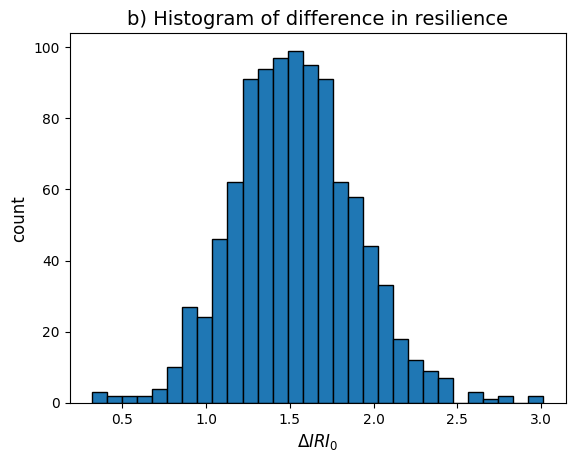

In [111]:
resl_indx0 = resl_indx.reshape(1000,2)

%matplotlib inline
plt.hist(resl_indx0[:,1] - resl_indx0[:,0], edgecolor="black", bins = 30)
plt.xlabel(r'$\Delta IRI_0$', fontsize = 12); plt.ylabel("count", fontsize = 12)
plt.title("b) Histogram of difference in resilience", fontsize = 14)

In [101]:
np.quantile((resl_indx0[:,1] - resl_indx0[:,0]), [0.025, 0.5, 0.975])

array([0.8639974 , 1.51292469, 2.29016098])

In [102]:
np.mean((resl_indx0[:,1] - resl_indx0[:,0]))

1.530775759995344